## Libraries

In [1]:
!pip install Ultralytics
!pip install mtcnn
!pip install mediapipe opencv-python
!pip install torch torchvision torchaudio
!pip install pycocotools
!pip install keras

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 922.2/922.2 kB 15.7 MB/s eta 0:00:0000:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 22.0 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 43.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 35.6/35.6 MB 40.6 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.6/294.6 kB 12.8 MB/s eta 0:00:00
  Attempting uninstall: protobuf
    Found existing installation: protobuf 3.20.3
    Uninstalling protobuf-3.20.3:
^C
ERROR: Operation cancelled by user
^C
ERROR: Operation cancelled by user
^C
Traceback (most recent call last):
  File "/usr/local/bin/pip3", line 8, in <module>
    sys.exit(main())
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/cli/main.py", line 78, in main
    command = create_command(cmd_name, isolated=("--isolated" in cmd_args))
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/commands/__init__.py", line 114, in create_comm

In [3]:
##Importing##
!pip install 'git+https://github.com/facebookresearch/detectron2.git'
from ultralytics import YOLO
from PIL import Image
import cv2
import numpy as np
import tensorflow as tf
import os
import torch
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import layers, Model
from keras.saving import register_keras_serializable
from tensorflow import keras
import tensorflow.keras.backend as K
import numpy as np
import tensorflow as tf
from tensorflow.keras import backend as K
from tensorflow.keras.preprocessing import image as keras_image
from mtcnn import MTCNN
from detectron2.engine import DefaultPredictor
from detectron2.utils.visualizer import Visualizer
from detectron2.data import MetadataCatalog
from detectron2.data.datasets import register_coco_instances
from detectron2.engine import DefaultTrainer
from detectron2.config import get_cfg
from detectron2 import model_zoo
from keras.saving import register_keras_serializable

  Cloning https://github.com/facebookresearch/detectron2.git to /tmp/pip-req-build-tk1zl439
  Running command git clone --filter=blob:none --quiet https://github.com/facebookresearch/detectron2.git /tmp/pip-req-build-tk1zl439
  Resolved https://github.com/facebookresearch/detectron2.git to commit 9604f5995cc628619f0e4fd913453b4d7d61db3f
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.2/50.2 kB 1.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.3/81.3 kB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.5/154.5 kB 8.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 36.0 MB/s eta 0:00:0000:01
  Created wheel for detectron2: filename=detectron2-0.6-cp310-cp310-linux_x86_64.whl size=5974720 sha256=f5ff35465bf56684aa53d0906144afd6144c08aa631f60fc45cccff34567f0af
  Stored in directory: /tmp/pip-ephem-wheel-cache-a6gfh2zn/wheels/47/e5/15/94c80df2ba85

In [56]:
###################Without Face Detectors##############


# Load models
agemodel = tf.keras.models.load_model("/kaggle/input/agemodel3/keras/default/1/age_classifier_finalfinal.h5")
gendermodel = tf.keras.models.load_model("/kaggle/input/gendermodel2/keras/default/1/mobilev2nettrial4_gender_classification.h5")

# Load YOLO model
model = YOLO('/kaggle/input/model_weights/pytorch/default/1/best (1).pt')

# Load image
image_path = '/kaggle/input/gendertest/fall3.jpg'
image = Image.open(image_path)

# Resize image
resized_image = image.resize((640, 640))

# Convert PIL image to OpenCV format (for easier cropping)
image_cv = cv2.cvtColor(np.array(resized_image), cv2.COLOR_RGB2BGR)

# Predict with YOLO
results = model(resized_image)
result = results[0]

# Iterate through the detected boxes
for i, box in enumerate(result.boxes):
    # Get bounding box coordinates
    x1, y1, x2, y2 = map(int, box.xyxy[0].tolist())  # Convert tensor to list and then to integers

    # If the box corresponds to the "injured" region (you can filter by class)
    if box.cls == 1:  # Assuming class 1 corresponds to "injured"
        # Crop the bounding box region from the image
        cropped_region = image_cv[y1:y2, x1:x2]

        # Resize cropped region to 224x224 for gender and age model input
        cropped_region_resized = cv2.resize(cropped_region, (224, 224))

        # Preprocess the cropped region (normalize and add batch dimension)
        cropped_region_resized = np.expand_dims(cropped_region_resized / 255.0, axis=0)

        # Predict gender using the gender model
        gender_pred = gendermodel.predict(cropped_region_resized)

        # Predict age using the age model
        age_pred = agemodel.predict(cropped_region_resized)

        # Get gender prediction
        gender_label = "Male" if gender_pred[0][0] > 0.5 else "Female"

        # Get age prediction (using predefined categories like Baby, Kid, Young, Old)
        age_classes = ["Baby", "Kid", "Old", "Young"]
        age_label = age_classes[np.argmax(age_pred)]  # Get highest probability class

        # Print results for the injured box
        print(f"Box {i}: Gender: {gender_label}, Age: {age_label}")

        # Optionally, save the cropped region with predicted labels
        output_path = f'/kaggle/working/injured_box_{i}_gender_{gender_label}_age_{age_label}.jpg'
        cv2.imwrite(output_path, cropped_region)
        print(f"Saved cropped injured box {i} to {output_path}")



0: 640x640 1 Injured, 36.9ms
Speed: 1.5ms preprocess, 36.9ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
Box 0: Gender: Male, Age: Baby
Saved cropped injured box 0 to /kaggle/working/injured_box_0_gender_Male_age_Baby.jpg


Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.

0: 640x640 1 Injured, 37.0ms
Speed: 6.2ms preprocess, 37.0ms inference, 277.3ms postprocess per image at shape (1, 3, 640, 640)
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
Detected Face in Injured Area: Gender: Male, Age: Old
Total Injuries Detected: 1


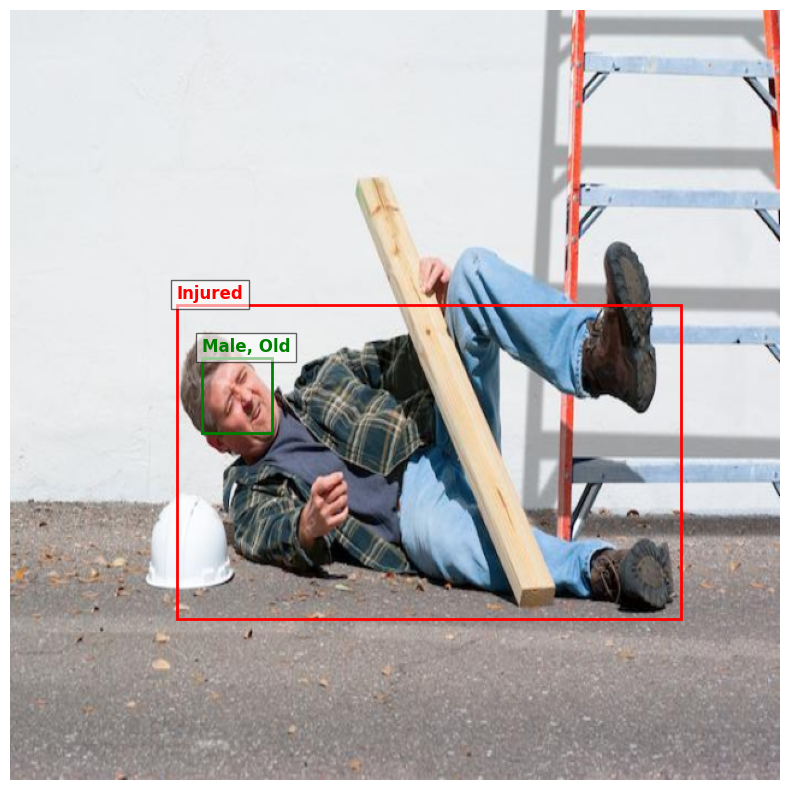

In [12]:
###################MTCNN##################


# Load models
agemodel = tf.keras.models.load_model("/kaggle/input/agemodel3/keras/default/1/age_classifier_finalfinal.h5")
gendermodel = tf.keras.models.load_model("/kaggle/input/gendermodel2/keras/default/1/mobilev2nettrial4_gender_classification.h5")
model = YOLO('/kaggle/input/model_weights/pytorch/default/1/best (1).pt')  # YOLO model

# Load image
image_path = '/kaggle/input/gendertest/fall3.jpg'
image = cv2.imread(image_path)
image = cv2.resize(image, (640, 640)) 
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert to RGB for visualization

# Run YOLO detection
results = model(image)
result = results[0]

# Initialize MTCNN for face detection
face_detector = MTCNN()

# Define age categories
age_classes = ["Baby", "Kid", "Old", "Young"]

# Create Matplotlib figure
fig, ax = plt.subplots(figsize=(10, 10))
ax.imshow(image_rgb)

# Initialize injury count
injury_count = 0

# Process each detection
for box, conf, cls in zip(result.boxes.xyxy, result.boxes.conf, result.boxes.cls):
    x1, y1, x2, y2 = map(int, box)  # Bounding box coordinates

    # Process only "injured" class (assuming class 1 is injured)
    if int(cls) == 1:
        injury_count += 1  # Increment injury count
        # Draw YOLO "injured" box (Red)
        ax.add_patch(plt.Rectangle((x1, y1), x2 - x1, y2 - y1, edgecolor='red', linewidth=2, fill=False))
        ax.text(x1, y1 - 5, "Injured", color='red', fontsize=12, fontweight='bold', bbox=dict(facecolor='white', alpha=0.6))

        # Crop injured region
        cropped_region = image_rgb[y1:y2, x1:x2]

        # Detect faces within the cropped region
        faces = face_detector.detect_faces(cropped_region)

        if faces:
            # If faces are detected, process them
            for face in faces:
                x, y, w, h = face['box']
                face_x1, face_y1, face_x2, face_y2 = x1 + x, y1 + y, x1 + x + w, y1 + y + h  # Adjust face position to original image

                # Draw face box (Green)
                ax.add_patch(plt.Rectangle((face_x1, face_y1), w, h, edgecolor='green', linewidth=2, fill=False))

                # Extract face
                face_img = image_rgb[face_y1:face_y2, face_x1:face_x2]
                face_img = cv2.resize(face_img, (224, 224))
                face_img = np.expand_dims(face_img / 255.0, axis=0)  # Normalize and add batch dim

                # Predict gender and age
                gender_pred = gendermodel.predict(face_img)
                age_pred = agemodel.predict(face_img)

                # Get predictions
                gender_label = "Male" if gender_pred[0][0] > 0.5 else "Female"
                age_label = age_classes[np.argmax(age_pred)]  # Get highest probability class

                # Overlay text for gender and age
                label_text = f"{gender_label}, {age_label}"
                ax.text(face_x1, face_y1 - 5, label_text, color='green', fontsize=12, fontweight='bold', bbox=dict(facecolor='white', alpha=0.6))

                print(f"Detected Face in Injured Area: Gender: {gender_label}, Age: {age_label}")
        else:
            # If no face detected, use the whole injured region for gender and age prediction
            # Predict gender and age for the entire injured region
            injured_img = image_rgb[y1:y2, x1:x2]
            injured_img = cv2.resize(injured_img, (224, 224))
            injured_img = np.expand_dims(injured_img / 255.0, axis=0)  # Normalize and add batch dim

            # Predict gender and age
            gender_pred = gendermodel.predict(injured_img)
            age_pred = agemodel.predict(injured_img)

            # Get predictions
            gender_label = "Male" if gender_pred[0][0] > 0.5 else "Female"
            age_label = age_classes[np.argmax(age_pred)]  # Get highest probability class

            # Overlay text for gender and age
            label_text = f"{gender_label}, {age_label}"
            ax.text(x1, y1 - 5, label_text, color='green', fontsize=12, fontweight='bold', bbox=dict(facecolor='white', alpha=0.6))

            print(f"Predicted Gender and Age for Injured Region: Gender: {gender_label}, Age: {age_label}")

# Display injury count
print(f"Total Injuries Detected: {injury_count}")

# Show final visualization
plt.axis("off")
plt.show()



0: 480x640 1 Injured, 73.6ms
Speed: 2.2ms preprocess, 73.6ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
Detected Face in Injured Area: Gender: Male, Age: Young
Total Injured Areas Processed: 1


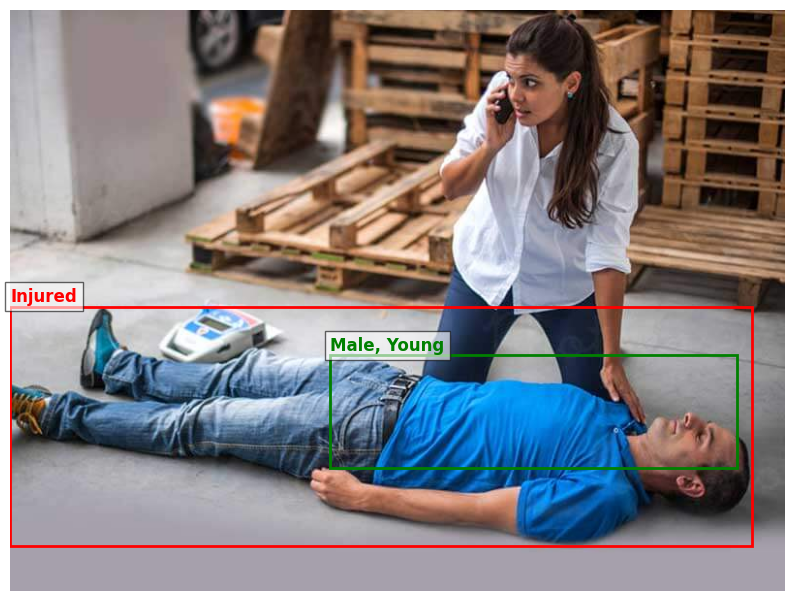

In [13]:
#################DNN################


# Load models
agemodel = tf.keras.models.load_model("/kaggle/input/agemodel3/keras/default/1/age_classifier_finalfinal.h5")
gendermodel = tf.keras.models.load_model("/kaggle/input/gendermodel2/keras/default/1/mobilev2nettrial4_gender_classification.h5")
model = YOLO('/kaggle/input/model_weights/pytorch/default/1/best (1).pt')  # YOLO model

# Load OpenCV's DNN Face Detector (ResNet-based)
face_net = cv2.dnn.readNetFromCaffe(
    "/kaggle/input/dnnproto/deploy.prototxt",
    "/kaggle/input/dnnproto/res10_300x300_ssd_iter_140000.caffemodel"
)


# Load image
image_path = '/kaggle/input/gendertest/injurytry2.jpg'
image = cv2.imread(image_path)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert to RGB for visualization
# Run YOLO detection
results = model(image)
result = results[0]

# Define age categories
age_classes = ["Baby", "Kid", "Old", "Young"]

# Create Matplotlib figure
fig, ax = plt.subplots(figsize=(10, 10))
ax.imshow(image_rgb)

# Initialize the injured counter
# Initialize the injured counter
injured_count = 0

# Process each detection
for box, conf, cls in zip(result.boxes.xyxy, result.boxes.conf, result.boxes.cls):
    x1, y1, x2, y2 = map(int, box)  # Bounding box coordinates

    # Process only "injured" class (assuming class 1 is injured)
    if int(cls) == 1:
        injured_count += 1  # Increment injury count
        
        # Draw YOLO "injured" box (Red)
        ax.add_patch(plt.Rectangle((x1, y1), x2 - x1, y2 - y1, edgecolor='red', linewidth=2, fill=False))
        ax.text(x1, y1 - 5, "Injured", color='red', fontsize=12, fontweight='bold', bbox=dict(facecolor='white', alpha=0.6))

        # Crop injured region
        cropped_region = image_rgb[y1:y2, x1:x2]

        # Prepare face detector input
        blob = cv2.dnn.blobFromImage(cropped_region, scalefactor=1.0, size=(300, 300), mean=(104.0, 177.0, 123.0))
        face_net.setInput(blob)
        detections = face_net.forward()

        # Variable to track if a face has already been detected in this injured region
        face_detected = False

        # Process faces in the cropped region
        for i in range(detections.shape[2]):
            confidence = detections[0, 0, i, 2]
            if confidence > 0.25:  # Confidence threshold
                h, w = cropped_region.shape[:2]  # Get height and width
                box = detections[0, 0, i, 3:7] * np.array([w, h, w, h])  # Scale correctly
                fx, fy, fw, fh = box.astype("int")

                face_x1, face_y1 = max(0, x1 + fx), max(0, y1 + fy)
                face_x2, face_y2 = min(image.shape[1], x1 + fx + fw), min(image.shape[0], y1 + fy + fh)

                # Check if face is already detected in this region
                if not face_detected:
                    # Draw face box (Green)
                    ax.add_patch(plt.Rectangle((face_x1, face_y1), fw, fh, edgecolor='green', linewidth=2, fill=False))

                    # Extract face
                    face_img = image_rgb[face_y1:face_y2, face_x1:face_x2]
                    face_img = cv2.resize(face_img, (224, 224))
                    face_img = np.expand_dims(face_img / 255.0, axis=0)  # Normalize and add batch dim

                    # Predict gender and age
                    gender_pred = gendermodel.predict(face_img)
                    age_pred = agemodel.predict(face_img)

                    # Get predictions
                    gender_label = "Male" if gender_pred[0][0] > 0.5 else "Female"
                    age_label = age_classes[np.argmax(age_pred)]  # Get highest probability class

                    # Overlay text for gender and age
                    label_text = f"{gender_label}, {age_label}"
                    ax.text(face_x1, face_y1 - 5, label_text, color='green', fontsize=12, fontweight='bold', bbox=dict(facecolor='white', alpha=0.6))

                    print(f"Detected Face in Injured Area: Gender: {gender_label}, Age: {age_label}")

                    # Set face_detected flag to True to prevent multiple detections in the same region
                    face_detected = True

# After processing all injuries, show the total count of injured areas
print(f"Total Injured Areas Processed: {injured_count}")

# Show final visualization
plt.axis("off")
plt.show()


            



0: 640x640 1 Injured, 37.0ms
Speed: 1.6ms preprocess, 37.0ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
Detected Gender: Male, Age: Old (from injured region)
Total Injured Areas Processed: 1


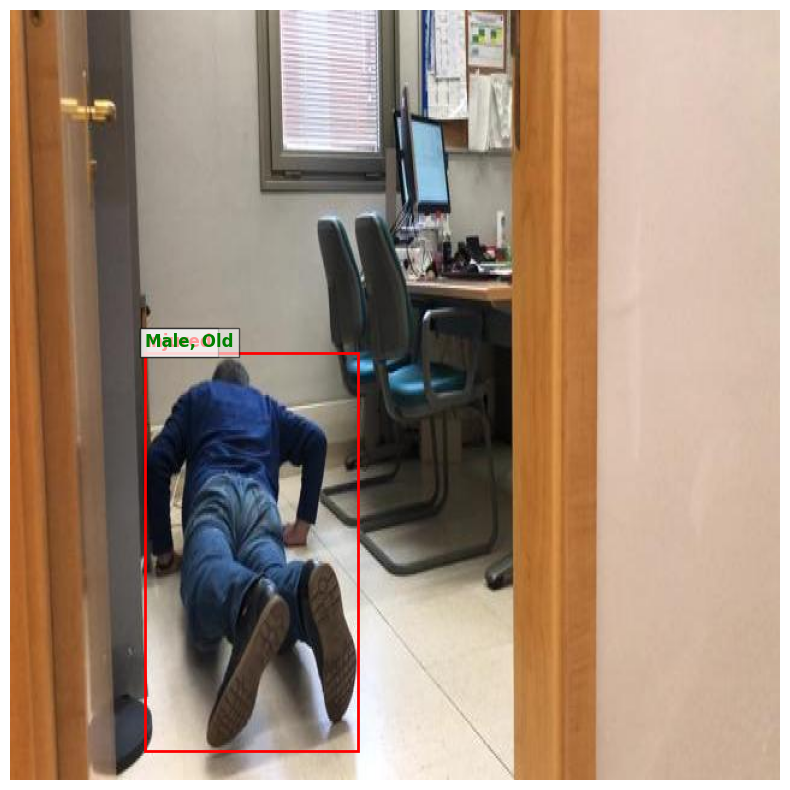

In [14]:
##################DNN if failed MTCNN if failed forcing the whole box#############


# Load models
agemodel = tf.keras.models.load_model("/kaggle/input/agemodel3/keras/default/1/age_classifier_finalfinal.h5")
gendermodel = tf.keras.models.load_model("/kaggle/input/gendermodel2/keras/default/1/mobilev2nettrial4_gender_classification.h5")
model = YOLO('/kaggle/input/model_weights/pytorch/default/1/best (1).pt')  # YOLO model

# Load OpenCV's DNN Face Detector (ResNet-based)
face_net = cv2.dnn.readNetFromCaffe(
    "/kaggle/input/dnnproto/deploy.prototxt",
    "/kaggle/input/dnnproto/res10_300x300_ssd_iter_140000.caffemodel"
)

# Initialize MTCNN for face detection
face_detector = MTCNN()

# Load image
image_path = '/kaggle/input/gendertest/tryacc1.jpg'
image = cv2.imread(image_path)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert to RGB for visualization

# Run YOLO detection
results = model(image)
result = results[0]

# Define age categories
age_classes = ["Baby", "Kid", "Old", "Young"]

# Create Matplotlib figure
fig, ax = plt.subplots(figsize=(10, 10))
ax.imshow(image_rgb)

# Initialize the injured counter
injured_count = 0

# Process each detection
for box, conf, cls in zip(result.boxes.xyxy, result.boxes.conf, result.boxes.cls):
    x1, y1, x2, y2 = map(int, box)  # Bounding box coordinates

    # Process only "injured" class (assuming class 1 is injured)
    if int(cls) == 1:
        injured_count += 1  # Increment injury count
        
        # Draw YOLO "injured" box (Red)
        ax.add_patch(plt.Rectangle((x1, y1), x2 - x1, y2 - y1, edgecolor='red', linewidth=2, fill=False))
        ax.text(x1, y1 - 5, "Injured", color='red', fontsize=12, fontweight='bold', bbox=dict(facecolor='white', alpha=0.6))

        # Crop injured region
        cropped_region = image_rgb[y1:y2, x1:x2]

        # Try DNN face detection
        blob = cv2.dnn.blobFromImage(cropped_region, scalefactor=1.0, size=(300, 300), mean=(104.0, 177.0, 123.0))
        face_net.setInput(blob)
        detections = face_net.forward()

        face_detected = False

        # Process faces detected by DNN
        for i in range(detections.shape[2]):
            confidence = detections[0, 0, i, 2]
            if confidence > 0.2:  # Confidence threshold
                h, w = cropped_region.shape[:2]
                box = detections[0, 0, i, 3:7] * np.array([w, h, w, h])
                fx, fy, fw, fh = box.astype("int")

                face_x1, face_y1 = max(0, x1 + fx), max(0, y1 + fy)
                face_x2, face_y2 = min(image.shape[1], x1 + fx + fw), min(image.shape[0], y1 + fy + fh)

                # Draw face box (Green)
                ax.add_patch(plt.Rectangle((face_x1, face_y1), fw, fh, edgecolor='green', linewidth=2, fill=False))

                # Extract face
                face_img = image_rgb[face_y1:face_y2, face_x1:face_x2]
                face_img = cv2.resize(face_img, (224, 224))
                face_img = np.expand_dims(face_img / 255.0, axis=0)  # Normalize and add batch dim

                # Predict gender and age
                gender_pred = gendermodel.predict(face_img)
                age_pred = agemodel.predict(face_img)

                # Get predictions
                gender_label = "Male" if gender_pred[0][0] > 0.5 else "Female"
                age_label = age_classes[np.argmax(age_pred)]  # Get highest probability class

                # Overlay text for gender and age
                label_text = f"{gender_label}, {age_label}"
                ax.text(face_x1, face_y1 - 5, label_text, color='green', fontsize=12, fontweight='bold', bbox=dict(facecolor='white', alpha=0.6))

                face_detected = True
                print(f"Detected Face in Injured Area by DNN: Gender: {gender_label}, Age: {age_label}")
                break

        # If no face was detected by DNN, try MTCNN
        if not face_detected:
            faces = face_detector.detect_faces(cropped_region)
            for face in faces:
                x, y, w, h = face['box']
                face_x1, face_y1, face_x2, face_y2 = x1 + x, y1 + y, x1 + x + w, y1 + y + h

                # Draw face box (Green)
                ax.add_patch(plt.Rectangle((face_x1, face_y1), w, h, edgecolor='green', linewidth=2, fill=False))

                # Extract face
                face_img = image_rgb[face_y1:face_y2, face_x1:face_x2]
                face_img = cv2.resize(face_img, (224, 224))
                face_img = np.expand_dims(face_img / 255.0, axis=0)  # Normalize and add batch dim

                # Predict gender and age
                gender_pred = gendermodel.predict(face_img)
                age_pred = agemodel.predict(face_img)

                # Get predictions
                gender_label = "Male" if gender_pred[0][0] > 0.5 else "Female"
                age_label = age_classes[np.argmax(age_pred)]  # Get highest probability class

                # Overlay text for gender and age
                label_text = f"{gender_label}, {age_label}"
                ax.text(face_x1, face_y1 - 5, label_text, color='green', fontsize=12, fontweight='bold', bbox=dict(facecolor='white', alpha=0.6))

                face_detected = True
                print(f"Detected Face in Injured Area by MTCNN: Gender: {gender_label}, Age: {age_label}")
                break

        # If no face was detected by both methods, use the entire injured region to predict gender and age
        if not face_detected:
            # Prepare the whole injured region for prediction
            injured_region = image_rgb[y1:y2, x1:x2]
            injured_region_resized = cv2.resize(injured_region, (224, 224))
            injured_region_resized = np.expand_dims(injured_region_resized / 255.0, axis=0)  # Normalize and add batch dim

            # Predict gender and age for the entire injured region
            gender_pred = gendermodel.predict(injured_region_resized)
            age_pred = agemodel.predict(injured_region_resized)

            # Get predictions
            gender_label = "Male" if gender_pred[0][0] > 0.5 else "Female"
            age_label = age_classes[np.argmax(age_pred)]  # Get highest probability class

            # Overlay text for gender and age
            label_text = f"{gender_label}, {age_label}"
            ax.text(x1, y1 - 5, label_text, color='green', fontsize=12, fontweight='bold', bbox=dict(facecolor='white', alpha=0.6))

            print(f"Detected Gender: {gender_label}, Age: {age_label} (from injured region)")

# After processing all injuries, show the total count of injured areas
print(f"Total Injured Areas Processed: {injured_count}")

# Show final visualization
plt.axis("off")
plt.show()



0: 352x640 1 Injured, 25.7ms
Speed: 2.0ms preprocess, 25.7ms inference, 1.5ms postprocess per image at shape (1, 3, 352, 640)
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
Total Injuries: 1, Blood Pixels: 51927


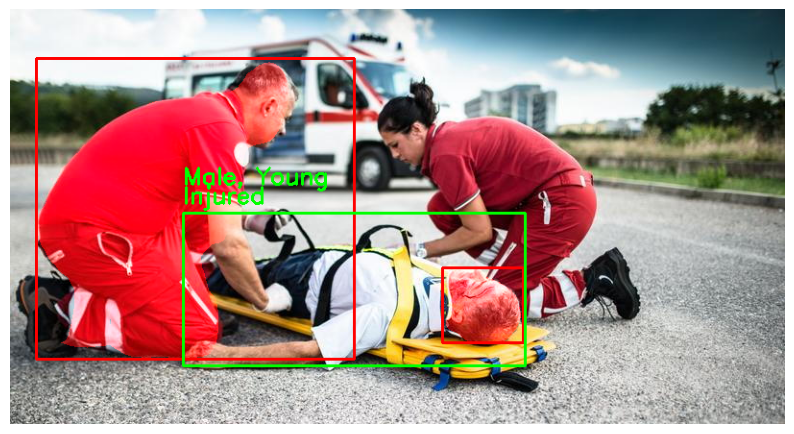

In [16]:

# ✅ Load models
agemodel = tf.keras.models.load_model("/kaggle/input/agemodel3/keras/default/1/age_classifier_finalfinal.h5")
gendermodel = tf.keras.models.load_model("/kaggle/input/gendermodel2/keras/default/1/mobilev2nettrial4_gender_classification.h5")
injury_model = YOLO('/kaggle/input/model_weights/pytorch/default/1/best (1).pt')  # YOLO injury detection

cfg = get_cfg()  # Initialize the Detectron2 config
cfg.merge_from_file(model_zoo.get_config_file("COCO-InstanceSegmentation/mask_rcnn_R_101_FPN_3x.yaml"))
cfg.MODEL.WEIGHTS = "/kaggle/input/bloodmodel/pytorch/default/2/model2finetuned.pth"  # Your trained model
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.85
cfg.MODEL.ROI_HEADS.NUM_CLASSES = 1  # Adjust this if your blood detection model has a different number of classes
cfg.MODEL.DEVICE = "cuda" if torch.cuda.is_available() else "cpu"

blood_predictor = DefaultPredictor(cfg)
# ✅ Load Mask R-CNN blood model

# ✅ Load OpenCV's DNN Face Detector
face_net = cv2.dnn.readNetFromCaffe(
    "/kaggle/input/dnnproto/deploy.prototxt",
    "/kaggle/input/dnnproto/res10_300x300_ssd_iter_140000.caffemodel"
)
face_detector = MTCNN()

def process_image(image_path):
    image = cv2.imread(image_path)
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    
    # 🔴 Detect Injuries (YOLO)
    results = injury_model(image)
    result = results[0]
    
    fig, ax = plt.subplots(figsize=(10, 10))
    
    injured_count = 0
    total_blood_pixels = 0
    blood_pixel_threshold = 5000  # Threshold for significant blood
    
    # 🔴 Detect Blood in the Entire Image (Keep Original Resolution)
    blood_outputs = blood_predictor(image)
    blood_masks = blood_outputs["instances"].pred_masks.cpu().numpy()
    blood_boxes = blood_outputs["instances"].pred_boxes.tensor.cpu().numpy()
    blood_scores = blood_outputs["instances"].scores.cpu().numpy()  # Get the confidence scores for blood detection

    # 🟥 Create a Red Mask for Blood
    blood_mask_color = np.zeros_like(image_rgb)
    
    for i, mask in enumerate(blood_masks):
        total_blood_pixels += np.sum(mask)
        x1, y1, x2, y2 = map(int, blood_boxes[i])
        score = blood_scores[i]  # Confidence score for this detection
        
        # Overlay blood mask directly on the full image
        blood_mask_color[mask] = [255, 0, 0]  # Red
        
        # Draw Blood Detection Box
        cv2.rectangle(image_rgb, (x1, y1), (x2, y2), (255, 0, 0), 2)
        
        # Add confidence score text above the blood mask
        confidence_text = f"{score * 100:.2f}%"  # Display confidence as percentage
        cv2.putText(image_rgb, confidence_text, (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.8, (255, 255, 255), 2)
    
    # Overlay the blood mask on the original image
    image_rgb = cv2.addWeighted(image_rgb, 1, blood_mask_color, 0.5, 0)
    
    # 🟢 Process Each Injury
    for box, conf, cls in zip(result.boxes.xyxy, result.boxes.conf, result.boxes.cls):
        x1, y1, x2, y2 = map(int, box)
        
        if int(cls) == 1:  # If it’s an injured person
            injured_count += 1
            
            # 🟦 Draw a Box Around Injured Person
            cv2.rectangle(image_rgb, (x1, y1), (x2, y2), (0, 255, 0), 2)
            cv2.putText(image_rgb, "Injured", (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.8, (0, 255, 0), 2)
            
            # 🔵 Face Detection
            cropped_region = image_rgb[y1:y2, x1:x2]
            blob = cv2.dnn.blobFromImage(cropped_region, scalefactor=1.0, size=(300, 300), mean=(104.0, 177.0, 123.0))
            face_net.setInput(blob)
            detections = face_net.forward()
            
            face_detected = False
            gender, age = "Unknown", "Unknown"
            
            for i in range(detections.shape[2]):
                confidence = detections[0, 0, i, 2]
                if confidence > 0.2:
                    fx, fy, fw, fh = (detections[0, 0, i, 3:7] * np.array([x2-x1, y2-y1, x2-x1, y2-y1])).astype(int)
                    face_img = image_rgb[y1+fy:y1+fy+fh, x1+fx:x1+fx+fw]
                    face_detected = True
                    break
            
            # If no face detected, use MTCNN
            if not face_detected:
                faces = face_detector.detect_faces(cropped_region)
                for face in faces:
                    x, y, w, h = face['box']
                    face_img = image_rgb[y1+y:y1+y+h, x1+x:x1+x+w]
                    face_detected = True
                    break
            
            # If still no face, use entire injured region
            if not face_detected:
                face_img = cropped_region
            
            # 🟢 Predict Gender & Age
            face_img = cv2.resize(face_img, (224, 224))
            face_img = np.expand_dims(face_img / 255.0, axis=0)
            gender_pred = gendermodel.predict(face_img)
            age_pred = agemodel.predict(face_img)
            
            gender = "Male" if gender_pred[0][0] > 0.5 else "Female"
            age_classes = ["Baby", "Kid", "Old", "Young"]
            age = age_classes[np.argmax(age_pred)]
            
            # 🟡 Overlay Age & Gender
            cv2.putText(image_rgb, f"{gender}, {age}", (x1, y1 - 30), cv2.FONT_HERSHEY_SIMPLEX, 0.8, (0, 255, 0), 2)
    
    print(f"Total Injuries: {injured_count}, Blood Pixels: {total_blood_pixels}")
    
    plt.axis("off")
    plt.imshow(image_rgb)
    plt.show()

# ✅ Run the function
process_image('/kaggle/input/gendertest/mtcnn6.jpg')



0: 448x640 5 Injureds, 29.0ms
Speed: 2.1ms preprocess, 29.0ms inference, 1.4ms postprocess per image at shape (1, 3, 448, 640)
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
Gender: Male, Age: Kid
No face recognized
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
Gender: Male, Age: Young
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
Gender: Male, Age: Baby
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
Gender: Male, Age: Young
Total Injuries: 5, Blood Pixels: 0


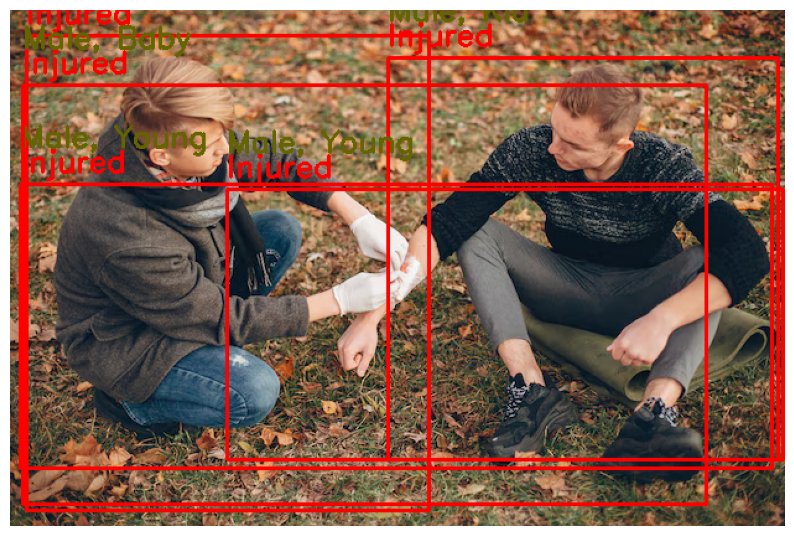

In [71]:


# ✅ Load models
agemodel = tf.keras.models.load_model("/kaggle/input/agemodel3/keras/default/1/age_classifier_finalfinal.h5")
gendermodel = tf.keras.models.load_model("/kaggle/input/gendermodel2/keras/default/1/mobilev2nettrial4_gender_classification.h5")
injury_model = YOLO('/kaggle/input/injured-not-injured-detection/pytorch/default/1/best (1).pt')  # YOLO injury detection

# ✅ Load Mask R-CNN blood model
cfg = get_cfg()  # Initialize the Detectron2 config
cfg.merge_from_file(model_zoo.get_config_file("COCO-InstanceSegmentation/mask_rcnn_R_101_FPN_3x.yaml"))
cfg.MODEL.WEIGHTS = "/kaggle/input/mask-rcnn-blood/pytorch/default/1/mask_rcnn_blood.pth"  # Your trained model
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.85
cfg.MODEL.ROI_HEADS.NUM_CLASSES = 1  # Adjust this if your blood detection model has a different number of classes
cfg.MODEL.DEVICE = "cuda" if torch.cuda.is_available() else "cpu"

blood_predictor = DefaultPredictor(cfg)

# ✅ Load OpenCV's DNN Face Detector
face_net = cv2.dnn.readNetFromCaffe(
    "/kaggle/input/dnnproto/deploy.prototxt",
    "/kaggle/input/dnnproto/res10_300x300_ssd_iter_140000.caffemodel"
)
face_detector = MTCNN()
def process_image(image_path):
    image = cv2.imread(image_path)
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    
    # 🔴 Detect Injuries (YOLO)
    results = injury_model(image)
    result = results[0]
    
    fig, ax = plt.subplots(figsize=(10, 10))
    
    injured_count = 0
    total_blood_pixels = 0
    blood_pixel_threshold = 5000  # Threshold for significant blood
    
    # 🔴 Detect Blood in the Entire Image (Keep Original Resolution)
    blood_outputs = blood_predictor(image)
    blood_masks = blood_outputs["instances"].pred_masks.cpu().numpy()
    blood_boxes = blood_outputs["instances"].pred_boxes.tensor.cpu().numpy()
    
    # 🟥 Create a Red Mask for Blood
    blood_mask_color = np.zeros_like(image_rgb)
    
    # 🟢 Process Each Injury
    for box, conf, cls in zip(result.boxes.xyxy, result.boxes.conf, result.boxes.cls):
        x1, y1, x2, y2 = map(int, box)
        
        if int(cls) == 1:  # If it’s an injured person
            injured_count += 1
            
            # 🟦 Draw a Box Around Injured Person
            cv2.rectangle(image_rgb, (x1, y1), (x2, y2), (255, 0, 0), 2)
            cv2.putText(image_rgb, "Injured", (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.8, (255, 0, 0), 2)
            
            # 🔴 Apply blood mask only inside the injury bounding box
            for i, mask in enumerate(blood_masks):
                x1_b, y1_b, x2_b, y2_b = map(int, blood_boxes[i])
                
                # Check if blood mask is inside the injury bounding box
                if (x1_b >= x1 and y1_b >= y1 and x2_b <= x2 and y2_b <= y2):
                    total_blood_pixels += np.sum(mask)
                    blood_mask_color[mask] = [255, 0, 0]  # Red
                    cv2.rectangle(image_rgb, (x1_b, y1_b), (x2_b, y2_b), (255, 0, 0), 2)
            
            # 🔵 Face Detection (DNN or MTCNN)
            cropped_region = image_rgb[y1:y2, x1:x2]
            blob = cv2.dnn.blobFromImage(cropped_region, scalefactor=1.0, size=(300, 300), mean=(104.0, 177.0, 123.0))
            face_net.setInput(blob)
            detections = face_net.forward()
            
            face_detected = False
            gender, age = "Unknown", "Unknown"
            
            # If a face is detected using DNN
            for i in range(detections.shape[2]):
                confidence = detections[0, 0, i, 2]
                if confidence > 0.2:
                    fx, fy, fw, fh = (detections[0, 0, i, 3:7] * np.array([x2-x1, y2-y1, x2-x1, y2-y1])).astype(int)
                    face_img = image_rgb[y1+fy:y1+fy+fh, x1+fx:x1+fx+fw]
                    face_detected = True
                    break
            
            # If no face detected, use MTCNN
            if not face_detected:
                faces = face_detector.detect_faces(cropped_region)
                for face in faces:
                    x, y, w, h = face['box']
                    face_img = image_rgb[y1+y:y1+y+h, x1+x:x1+x+w]
                    face_detected = True
                    break
            
            # If still no face, print "No face recognized"
            if not face_detected:
                print("No face recognized")
            else:
                # 🟢 Predict Gender & Age
                face_img = cv2.resize(face_img, (224, 224))
                face_img = np.expand_dims(face_img / 255.0, axis=0)
                gender_pred = gendermodel.predict(face_img)
                age_pred = agemodel.predict(face_img)
                
                gender = "Male" if gender_pred[0][0] > 0.5 else "Female"
                age_classes = ["Baby", "Kid", "Old", "Young"]
                age = age_classes[np.argmax(age_pred)]
                print(f"Gender: {gender}, Age: {age}")
                # 🟡 Overlay Age & Gender
                cv2.putText(image_rgb, f"{gender}, {age}", (x1, y1 - 30), cv2.FONT_HERSHEY_SIMPLEX, 0.8, (100, 100, 0), 2)
    
    print(f"Total Injuries: {injured_count}, Blood Pixels: {total_blood_pixels}")
    
    # Overlay the blood mask on the original image
    image_rgb = cv2.addWeighted(image_rgb, 1, blood_mask_color, 0.5, 0)
    
    plt.axis("off")
    plt.imshow(image_rgb)
    plt.show()

# ✅ Run the function
process_image('/kaggle/input/gendertest/injuredtry4.png')




0: 384x640 2 Not-Injureds, 26.9ms
Speed: 1.9ms preprocess, 26.9ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)
Total Injuries: 0, Blood Pixels Inside Injured Region: 773


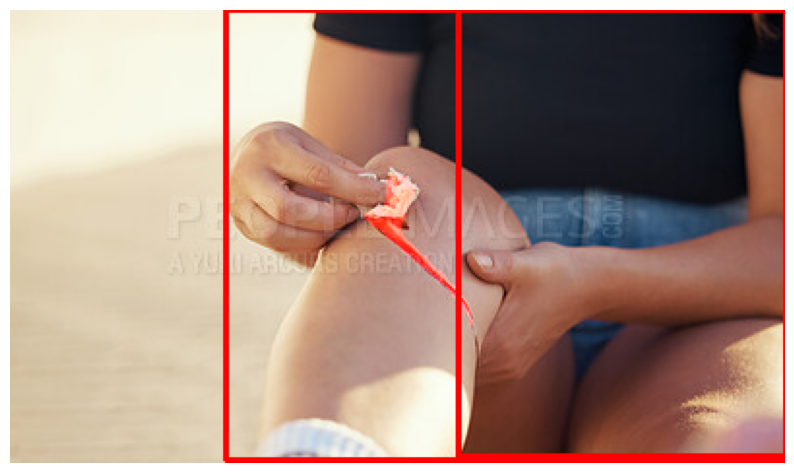

In [47]:


# ✅ Load models
agemodel = tf.keras.models.load_model("/kaggle/input/agemodel3/keras/default/1/age_classifier_finalfinal.h5")
gendermodel = tf.keras.models.load_model("/kaggle/input/gendermodel2/keras/default/1/mobilev2nettrial4_gender_classification.h5")
injury_model = YOLO('/kaggle/input/model_weights/pytorch/default/1/best (1).pt')  # YOLO injury detection

cfg = get_cfg()  # Initialize the Detectron2 config
cfg.merge_from_file(model_zoo.get_config_file("COCO-InstanceSegmentation/mask_rcnn_R_101_FPN_3x.yaml"))
cfg.MODEL.WEIGHTS = "/kaggle/input/bloodmodel/pytorch/default/2/model2finetuned.pth"  # Your trained model
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.85
cfg.MODEL.ROI_HEADS.NUM_CLASSES = 1  # Adjust this if your blood detection model has a different number of classes
cfg.MODEL.DEVICE = "cuda" if torch.cuda.is_available() else "cpu"

blood_predictor = DefaultPredictor(cfg)  # Blood detection model

# ✅ Load OpenCV's DNN Face Detector
face_net = cv2.dnn.readNetFromCaffe(
    "/kaggle/input/dnnproto/deploy.prototxt",
    "/kaggle/input/dnnproto/res10_300x300_ssd_iter_140000.caffemodel"
)
face_detector = MTCNN()

# Define age categories
age_classes = ["Baby", "Kid", "Old", "Young"]

def process_image(image_path):
    image = cv2.imread(image_path)
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    
    # 🔴 Detect Injuries (YOLO)
    results = injury_model(image)
    result = results[0]
    
    injured_count = 0
    total_blood_pixels = 0
    blood_pixel_threshold = 5000  # Threshold for significant blood
    
    # 🟥 If no injuries detected, skip further processing
    if len(result.boxes) == 0:
        print("No injuries detected.")
        return  # Exit early if no injuries are detected

    fig, ax = plt.subplots(figsize=(10, 10))
    
    # 🔴 Detect Blood in the Entire Image (Keep Original Resolution)
    blood_outputs = blood_predictor(image)
    blood_masks = blood_outputs["instances"].pred_masks.cpu().numpy()
    blood_boxes = blood_outputs["instances"].pred_boxes.tensor.cpu().numpy()
    
    # 🟥 Create a Red Mask for Blood
    blood_mask_color = np.zeros_like(image_rgb)
    
    # 🟢 Process Each Injury
    for box, conf, cls in zip(result.boxes.xyxy, result.boxes.conf, result.boxes.cls):
        x1, y1, x2, y2 = map(int, box)
        
        if int(cls) == 1:  # If it’s an injured person
            injured_count += 1
            # Crop injured region
        cv2.rectangle(image_rgb, (x1, y1), (x2, y2), (255, 0, 0), 2)
        cv2.putText(image_rgb, "Injured", (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.8, (255, 0, 0), 2)
        cropped_region = image_rgb[y1:y2, x1:x2]

        # 🔴 Mask the Blood Segments inside the Injured Bounding Box
        for i, mask in enumerate(blood_masks):
            # Get the blood mask's bounding box
            bx1, by1, bx2, by2 = map(int, blood_boxes[i])
            
            # Check if the blood mask intersects with the injury box
            if (bx2 > x1 and bx1 < x2 and by2 > y1 and by1 < y2):  # If there's an overlap
                # Extract the overlap region
                overlap_x1 = max(x1, bx1)
                overlap_y1 = max(y1, by1)
                overlap_x2 = min(x2, bx2)
                overlap_y2 = min(y2, by2)
                
                # Create a mask for the overlapping area
                overlap_mask = mask[overlap_y1:overlap_y2, overlap_x1:overlap_x2]
                total_blood_pixels += np.sum(overlap_mask)
                
                # Overlay the blood mask on the image within the injury region
                blood_mask_color[overlap_y1:overlap_y2, overlap_x1:overlap_x2][overlap_mask] = [255, 0, 0]  # Red

    # Overlay the blood mask on the original image
    image_rgb = cv2.addWeighted(image_rgb, 1, blood_mask_color, 0.5, 0)
    
    print(f"Total Injuries: {injured_count}, Blood Pixels Inside Injured Region: {total_blood_pixels}")
    
    # If injuries are detected, run gender and age models
    if injured_count > 0:
        face_detected = False
        
        # 🔴 Face Detection and Prediction (DNN First, then MTCNN if no face)
        for box, _ in zip(result.boxes.xyxy, result.boxes.conf):
            x1, y1, x2, y2 = map(int, box)
            cropped_region = image_rgb[y1:y2, x1:x2]
            
            # Try DNN face detection
            blob = cv2.dnn.blobFromImage(cropped_region, scalefactor=1.0, size=(300, 300), mean=(104.0, 177.0, 123.0))
            face_net.setInput(blob)
            detections = face_net.forward()
            
            for i in range(detections.shape[2]):
                confidence = detections[0, 0, i, 2]
                if confidence > 0.2:  # Confidence threshold
                    h, w = cropped_region.shape[:2]
                    box = detections[0, 0, i, 3:7] * np.array([w, h, w, h])
                    fx, fy, fw, fh = box.astype("int")

                    face_x1, face_y1 = max(0, x1 + fx), max(0, y1 + fy)
                    face_x2, face_y2 = min(image.shape[1], x1 + fx + fw), min(image.shape[0], y1 + fy + fh)

                    # Predict gender and age
                    face_img = cropped_region[face_y1:face_y2, face_x1:face_x2]
                    face_img = cv2.resize(face_img, (224, 224))
                    face_img = np.expand_dims(face_img / 255.0, axis=0)  # Normalize and add batch dim
                    
                    gender_pred = gendermodel.predict(face_img)
                    age_pred = agemodel.predict(face_img)
                    
                    gender_label = "Male" if gender_pred[0][0] > 0.5 else "Female"
                    age_label = age_classes[np.argmax(age_pred)]  # Get highest probability class
                    
                    # Draw face bounding box and overlay age and gender
                    cv2.rectangle(image_rgb, (face_x1, face_y1), (face_x2, face_y2), (0, 255, 0), 2)
                    cv2.putText(image_rgb, f"{gender_label}, {age_label}", (face_x1, face_y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.8, (0, 255, 0), 2)
                    
                    face_detected = True
                    print(f"Face Detected: Gender: {gender_label}, Age: {age_label}")
                    break

            # If no face detected with DNN, try MTCNN
            if not face_detected:
                faces = face_detector.detect_faces(cropped_region)
                for face in faces:
                    x, y, w, h = face['box']
                    face_x1, face_y1, face_x2, face_y2 = x1 + x, y1 + y, x1 + x + w, y1 + y + h

                    # Predict gender and age
                    face_img = image_rgb[face_y1:face_y2, face_x1:face_x2]
                    face_img = cv2.resize(face_img, (224, 224))
                    face_img = np.expand_dims(face_img / 255.0, axis=0)  # Normalize and add batch dim
                    
                    gender_pred = gendermodel.predict(face_img)
                    age_pred = agemodel.predict(face_img)
                    
                    gender_label = "Male" if gender_pred[0][0] > 0.5 else "Female"
                    age_label = age_classes[np.argmax(age_pred)]  # Get highest probability class
                    
                    # Draw face bounding box and overlay age and gender
                    cv2.rectangle(image_rgb, (face_x1, face_y1), (face_x2, face_y2), (0, 255, 0), 2)
                    cv2.putText(image_rgb, f"{gender_label}, {age_label}", (face_x1, face_y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.8, (0, 255, 0), 2)

                    face_detected = True
                    print(f"Face Detected by MTCNN: Gender: {gender_label}, Age: {age_label}")
                    break
        
        if not face_detected:
            print("No face detected")
            
    # Show result
    plt.imshow(image_rgb)
    plt.axis('off')
    plt.show()


process_image("/kaggle/input/blmodeltest/bltest5.jpg")



0: 640x640 2 Injureds, 37.2ms
Speed: 1.9ms preprocess, 37.2ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)
No face recognized
No face recognized
Total Injuries: 2, Blood Pixels: 0


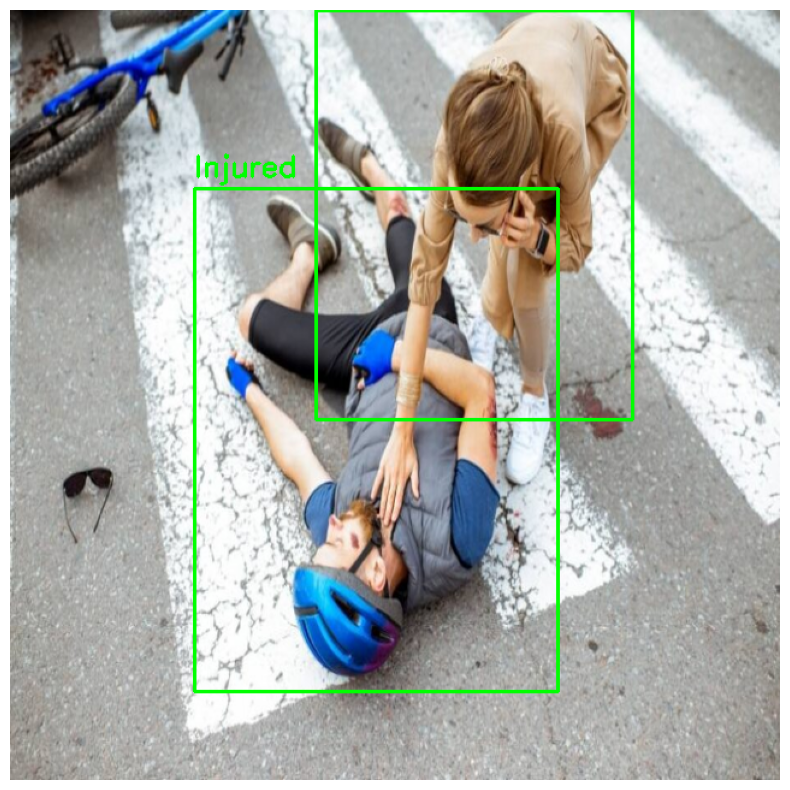

In [84]:


def process_image(image_path):
    image = cv2.imread(image_path)
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image_resized = cv2.resize(image_rgb, (640, 640))

    # 🔴 Detect Injuries (YOLO)
    results = injury_model(image_resized)
    result = results[0]
    
    injured_count = 0
    total_blood_pixels = 0
    blood_pixel_threshold = 5000  # Threshold for significant blood
    
    # 🔴 Only proceed with injury detection if YOLO detects an injury
    if len(result.boxes) > 0 and result.boxes.conf[0] > 0.5:  # Threshold confidence value
        fig, ax = plt.subplots(figsize=(10, 10))
        
        # 🔴 Detect Blood in the Entire Image (Keep Original Resolution)
        blood_outputs = blood_predictor(image_resized)
        blood_masks = blood_outputs["instances"].pred_masks.cpu().numpy()
        blood_boxes = blood_outputs["instances"].pred_boxes.tensor.cpu().numpy()
        
        # 🟥 Create a Red Mask for Blood
        blood_mask_color = np.zeros_like(image_resized)
        
        for i, mask in enumerate(blood_masks):
            total_blood_pixels += np.sum(mask)
            x1, y1, x2, y2 = map(int, blood_boxes[i])
            
            # Overlay blood mask directly on the full image
            blood_mask_color[mask] = [255, 0, 0]  # Red
            
            # Draw Blood Detection Box
            cv2.rectangle(image_resized, (x1, y1), (x2, y2), (255, 0, 0), 2)
        
        # Overlay the blood mask on the original image
        image_rgb = cv2.addWeighted(image_resized, 1, blood_mask_color, 0.5, 0)
        
        # 🟢 Process Each Injury
        for box, conf, cls in zip(result.boxes.xyxy, result.boxes.conf, result.boxes.cls):
            x1, y1, x2, y2 = map(int, box)
            
            if int(cls) == 1:  # If it’s an injured person
                injured_count += 1
                
                # 🟦 Draw a Box Around Injured Person on Original Image
                cv2.rectangle(image_rgb, (x1, y1), (x2, y2), (0, 255, 0), 2)
                cv2.putText(image_rgb, "Injured", (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.8, (0, 255, 0), 2)
                
                # 🔵 Face Detection
                cropped_region = image_resized[y1:y2, x1:x2]
                blob = cv2.dnn.blobFromImage(cropped_region, scalefactor=1.0, size=(300, 300), mean=(104.0, 177.0, 123.0))
                face_net.setInput(blob)
                detections = face_net.forward()
                
                face_detected = False
                gender, age = "Unknown", "Unknown"
                
                # Try to detect face using OpenCV DNN
                for i in range(detections.shape[2]):
                    confidence = detections[0, 0, i, 2]
                    if confidence > 0.2:
                        fx, fy, fw, fh = (detections[0, 0, i, 3:7] * np.array([x2-x1, y2-y1, x2-x1, y2-y1])).astype(int)
                        face_img = image_resized[y1+fy:y1+fy+fh, x1+fx:x1+fx+fw]
                        face_detected = True
                        break
                
                # If no face detected, use MTCNN
                if not face_detected:
                    faces = face_detector.detect_faces(cropped_region)
                    for face in faces:
                        x, y, w, h = face['box']
                        face_img = image_resized[y1+y:y1+y+h, x1+x:x1+x+w]
                        face_detected = True
                        break
                
                # If still no face, fallback to a message
                if not face_detected:
                    print("No face recognized")
                else:
                    # 🟢 Predict Gender & Age
                    face_img = cv2.resize(face_img, (224, 224))
                    face_img = np.expand_dims(face_img / 255.0, axis=0)
                    gender_pred = gendermodel.predict(face_img)
                    age_pred = agemodel.predict(face_img)
                    
                    gender = "Male" if gender_pred[0][0] > 0.5 else "Female"
                    age_classes = ["Baby", "Kid", "Old", "Young"]
                    age = age_classes[np.argmax(age_pred)]
                    
                    # 🟡 Overlay Age & Gender on the Original Image
                    cv2.putText(image_rgb, f"{gender}, {age}", (x1, y1 - 30), cv2.FONT_HERSHEY_SIMPLEX, 0.8, (0, 255, 0), 2)
        
        print(f"Total Injuries: {injured_count}, Blood Pixels: {total_blood_pixels}")
        
        # Show Image
        plt.axis("off")
        plt.imshow(image_rgb)
        plt.show()
    else:
        print("No injury detected. Skipping face and blood detection.")

# ✅ Run the function
process_image('/kaggle/input/gendertest/mtcnn5.jpg')


## Model 1 YOLO Injured Detection


0: 640x640 1 Injured, 37.0ms
Speed: 1.9ms preprocess, 37.0ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


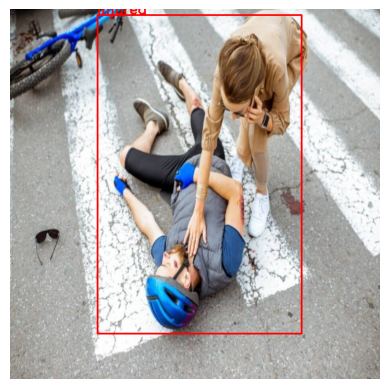

Number of injured persons detected: 1


In [127]:

injury_model = YOLO("/kaggle/input/injured-not-injured-detection/pytorch/default/1/best (1).pt")
image = cv2.imread('/kaggle/input/alltest/3.jpg')
image_resized = cv2.resize(image, (640, 640))
results = injury_model(image_resized)
result = results[0]
injured_count = 0
for box, conf, cls in zip(result.boxes.xyxy, result.boxes.conf, result.boxes.cls):
    x1, y1, x2, y2 = map(int, box)
    if int(cls) == 1:
        injured_count += 1
        cv2.rectangle(image_resized, (x1, y1), (x2, y2), (0, 0, 255), 2)  # Red color (BGR)
        cv2.putText(image_resized, "Injured", (x1, y1 - 2), cv2.FONT_HERSHEY_SIMPLEX, 0.8, (0, 0, 255), 2)  # Red text
image_resized_rgb = cv2.cvtColor(image_resized, cv2.COLOR_BGR2RGB)
plt.axis("off")
plt.imshow(image_resized_rgb)
plt.show()
print(f"Number of injured persons detected: {injured_count}")


## Injured Detection and Blood


0: 640x640 1 Injured, 36.9ms
Speed: 1.8ms preprocess, 36.9ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)
Total Injuries Detected: 1
Total Blood Pixels: 1598
Total Pixels in Image: 409600


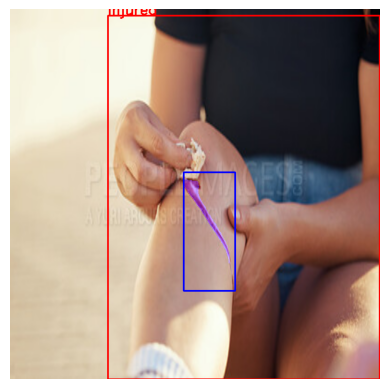

In [161]:


injury_model = YOLO("/kaggle/input/injured-not-injured-detection/pytorch/default/1/best (1).pt")

cfg = get_cfg()
cfg.merge_from_file(model_zoo.get_config_file("COCO-InstanceSegmentation/mask_rcnn_R_101_FPN_3x.yaml"))
cfg.MODEL.WEIGHTS = "/kaggle/input/mask-rcnn-blood/pytorch/default/1/mask_rcnn_blood.pth"
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.85
cfg.MODEL.ROI_HEADS.NUM_CLASSES = 1
cfg.MODEL.DEVICE = "cuda" if torch.cuda.is_available() else "cpu"
blood_predictor = DefaultPredictor(cfg)
image = cv2.imread('/kaggle/input/blmodeltest/bltest5.jpg')
image_resized = cv2.resize(image, (640, 640))
results = injury_model(image_resized)
result = results[0]
injured_count = 0
injured_boxes = []
for box, conf, cls in zip(result.boxes.xyxy, result.boxes.conf, result.boxes.cls):
    x1, y1, x2, y2 = map(int, box)
    if int(cls) == 1:  # Class 1 refers to injured
        injured_count += 1
        injured_boxes.append((x1, y1, x2, y2))
        cv2.rectangle(image_resized, (x1, y1), (x2, y2), (0, 0, 255), 2)  # Red color (BGR)
        cv2.putText(image_resized, "Injured", (x1, y1 - 2), cv2.FONT_HERSHEY_SIMPLEX, 0.8, (0, 0, 255), 2)  # Red text
print(f"Total Injuries Detected: {injured_count}")
total_blood_pixels = 0  
if injured_count > 0:
    blood_outputs = blood_predictor(image_resized)
    blood_masks = blood_outputs["instances"].pred_masks.cpu().numpy()
    blood_boxes = blood_outputs["instances"].pred_boxes.tensor.cpu().numpy()
    blood_mask_color = np.zeros_like(image_resized)
    for i, mask in enumerate(blood_masks):
        total_blood_pixels += np.sum(mask)
        x1_blood, y1_blood, x2_blood, y2_blood = map(int, blood_boxes[i])
        for (x1_inj, y1_inj, x2_inj, y2_inj) in injured_boxes:
            if not (x2_blood < x1_inj or x1_blood > x2_inj or y2_blood < y1_inj or y1_blood > y2_inj):  # Check overlap
                blood_mask_color[mask] = [255, 0, 0]  # Red color for blood area
                cv2.rectangle(image_resized, (x1_blood, y1_blood), (x2_blood, y2_blood), (255, 0, 0), 2)  # Draw red rectangle for blood
    image_resized = cv2.addWeighted(image_resized, 1, blood_mask_color, 0.5, 0)
print(f"Total Blood Pixels: {total_blood_pixels}")
total_pixels = image_resized.shape[0] * image_resized.shape[1]
print(f"Total Pixels in Image: {total_pixels}")
image_resized_rgb = cv2.cvtColor(image_resized, cv2.COLOR_BGR2RGB)
plt.axis("off")
plt.imshow(image_resized_rgb)
plt.show()


## Gender and Age


0: 448x640 1 Injured, 28.0ms
Speed: 2.1ms preprocess, 28.0ms inference, 1.4ms postprocess per image at shape (1, 3, 448, 640)
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
Detected Face in Injured Area by MTCNN: Gender: Male, Age: Old
Total Injured Areas Processed: 1


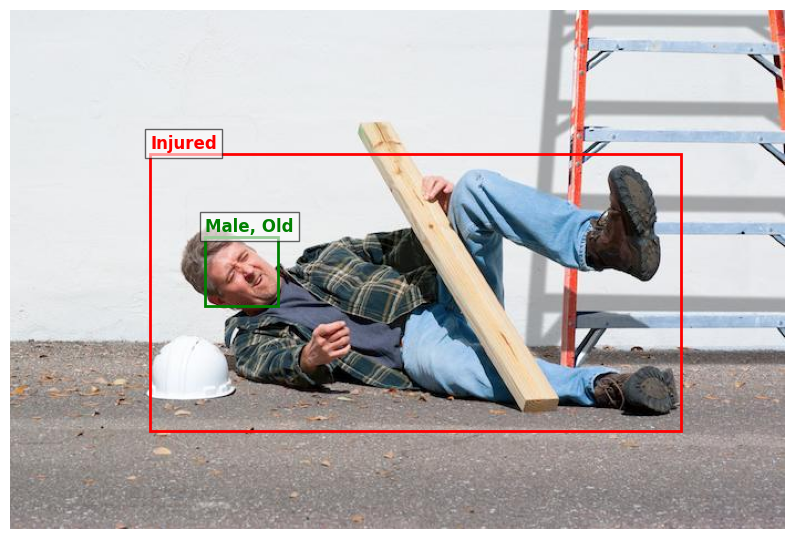

In [152]:

# Load models
agemodel = tf.keras.models.load_model("/kaggle/input/agemodel3/keras/default/1/age_classifier_finalfinal.h5")
gendermodel = tf.keras.models.load_model("/kaggle/input/gendermodel2/keras/default/1/mobilev2nettrial4_gender_classification.h5")
model = YOLO('/kaggle/input/injured-not-injured-detection/pytorch/default/1/best (1).pt')  # YOLO model

# Load OpenCV's DNN Face Detector (ResNet-based)
face_net = cv2.dnn.readNetFromCaffe(
    "/kaggle/input/dnnproto/deploy.prototxt",
    "/kaggle/input/dnnproto/res10_300x300_ssd_iter_140000.caffemodel"
)

# Initialize MTCNN for face detection
face_detector = MTCNN()

# Load image
image_path = '/kaggle/input/gendertest/fall3.jpg'
image = cv2.imread(image_path)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert to RGB for visualization

# Run YOLO detection
results = model(image)
result = results[0]

# Define age categories
age_classes = ["Baby", "Kid", "Old", "Young"]

# Create Matplotlib figure
fig, ax = plt.subplots(figsize=(10, 10))
ax.imshow(image_rgb)

# Initialize the injured counter
injured_count = 0

# Process each detection (for injuries)
for box, conf, cls in zip(result.boxes.xyxy, result.boxes.conf, result.boxes.cls):
    x1, y1, x2, y2 = map(int, box)  # Bounding box coordinates

    # Process only "injured" class (assuming class 1 is injured)
    if int(cls) == 1:
        injured_count += 1  # Increment injury count
        
        # Draw YOLO "injured" box (Red)
        ax.add_patch(plt.Rectangle((x1, y1), x2 - x1, y2 - y1, edgecolor='red', linewidth=2, fill=False))
        ax.text(x1, y1 - 5, "Injured", color='red', fontsize=12, fontweight='bold', bbox=dict(facecolor='white', alpha=0.6))

        # Crop injured region
        cropped_region = image_rgb[y1:y2, x1:x2]

        # Try DNN face detection on entire image
        blob = cv2.dnn.blobFromImage(image_rgb, scalefactor=1.0, size=(300, 300), mean=(104.0, 177.0, 123.0))
        face_net.setInput(blob)
        detections = face_net.forward()

        face_detected = False

        # Process faces detected by DNN
        for i in range(detections.shape[2]):
            confidence = detections[0, 0, i, 2]
            if confidence > 0.2:  # Confidence threshold
                h, w = image_rgb.shape[:2]
                box = detections[0, 0, i, 3:7] * np.array([w, h, w, h])
                fx, fy, fw, fh = box.astype("int")

                # Check if the face lies within the injured region box
                if x1 <= fx <= x2 and y1 <= fy <= y2:  # Face inside the injured area
                    face_x1, face_y1 = max(0, fx), max(0, fy)
                    face_x2, face_y2 = min(image.shape[1], fx + fw), min(image.shape[0], fy + fh)

                    # Draw face box (Green)
                    ax.add_patch(plt.Rectangle((face_x1, face_y1), fw, fh, edgecolor='green', linewidth=2, fill=False))

                    # Extract face
                    face_img = image_rgb[face_y1:face_y2, face_x1:face_x2]
                    face_img = cv2.resize(face_img, (224, 224))
                    face_img = np.expand_dims(face_img / 255.0, axis=0)  # Normalize and add batch dim

                    # Predict gender and age
                    gender_pred = gendermodel.predict(face_img)
                    age_pred = agemodel.predict(face_img)

                    # Get predictions
                    gender_label = "Male" if gender_pred[0][0] > 0.5 else "Female"
                    age_label = age_classes[np.argmax(age_pred)]  # Get highest probability class

                    # Overlay text for gender and age
                    label_text = f"{gender_label}, {age_label}"
                    ax.text(face_x1, face_y1 - 5, label_text, color='green', fontsize=12, fontweight='bold', bbox=dict(facecolor='white', alpha=0.6))

                    face_detected = True
                    print(f"Detected Face in Injured Area by DNN: Gender: {gender_label}, Age: {age_label}")
                    break

        # If no face was detected by DNN, try MTCNN
        if not face_detected:
            faces = face_detector.detect_faces(image_rgb)
            for face in faces:
                x, y, w, h = face['box']
                face_x1, face_y1, face_x2, face_y2 = x, y, x + w, y + h

                # Check if the face lies within the injured region box
                if x1 <= face_x1 <= x2 and y1 <= face_y1 <= y2:
                    # Draw face box (Green)
                    ax.add_patch(plt.Rectangle((face_x1, face_y1), w, h, edgecolor='green', linewidth=2, fill=False))

                    # Extract face
                    face_img = image_rgb[face_y1:face_y2, face_x1:face_x2]
                    face_img = cv2.resize(face_img, (224, 224))
                    face_img = np.expand_dims(face_img / 255.0, axis=0)  # Normalize and add batch dim

                    # Predict gender and age
                    gender_pred = gendermodel.predict(face_img)
                    age_pred = agemodel.predict(face_img)

                    # Get predictions
                    gender_label = "Male" if gender_pred[0][0] > 0.5 else "Female"
                    age_label = age_classes[np.argmax(age_pred)]  # Get highest probability class

                    # Overlay text for gender and age
                    label_text = f"{gender_label}, {age_label}"
                    ax.text(face_x1, face_y1 - 5, label_text, color='green', fontsize=12, fontweight='bold', bbox=dict(facecolor='white', alpha=0.6))

                    face_detected = True
                    print(f"Detected Face in Injured Area by MTCNN: Gender: {gender_label}, Age: {age_label}")
                    break

        # If no face was detected by both methods
        if not face_detected:
            print("No faces recognized and cannot get gender and age info")

# After processing all injuries, show the total count of injured areas
print(f"Total Injured Areas Processed: {injured_count}")

# Show final visualization
plt.axis("off")
plt.show()


## Full Integration 

In [4]:
import sqlite3

# Connect to the database (or create it)
conn = sqlite3.connect("injuries_analysis.db")
cursor = conn.cursor()


# Create InjuryAnalysis Table with Foreign Key
cursor.execute("""
    CREATE TABLE IF NOT EXISTS InjuryAnalysis (
        id INTEGER PRIMARY KEY AUTOINCREMENT,
        injuries_count INTEGER,
        gender TEXT,
        age TEXT,
        category_burn TEXT,
        category_wound TEXT,
        blood_info TEXT
    )
""")

# Commit & Close
conn.commit()
conn.close()
print("Database & Tables Created Successfully!")


Database & Tables Created Successfully!


In [5]:
def save_injury_data(injuries_count, gender, age, category_burn, category_wound, blood_info):
    # Connect to the database
    conn = sqlite3.connect("injuries_analysis.db")
    cursor = conn.cursor()
    
    # Insert the data into the InjuryAnalysis table
    cursor.execute("""
        INSERT INTO InjuryAnalysis (injuries_count, gender, age, category_burn, category_wound, blood_info)
        VALUES (?, ?, ?, ?, ?, ?)
    """, (injuries_count, gender, age, category_burn ,category_wound, blood_info))
    
    # Commit & Close
    conn.commit()
    conn.close()
    print("Injury data saved successfully!")

/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:713: UserWarning: Skipping variable loading for optimizer 'adam', because it has 341 variables whereas the saved optimizer has 1 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))



0: 640x640 1 Not-Injured, 1 Injured, 1366.8ms
Speed: 3.4ms preprocess, 1366.8ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)
Total Injuries Detected: 1
Total Blood Pixels: 28760
Blood Severity: Excessive
Total Pixels in Image: 409600
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
Detected Face in Injured Area by DNN: Gender: Male, Age: Old
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step


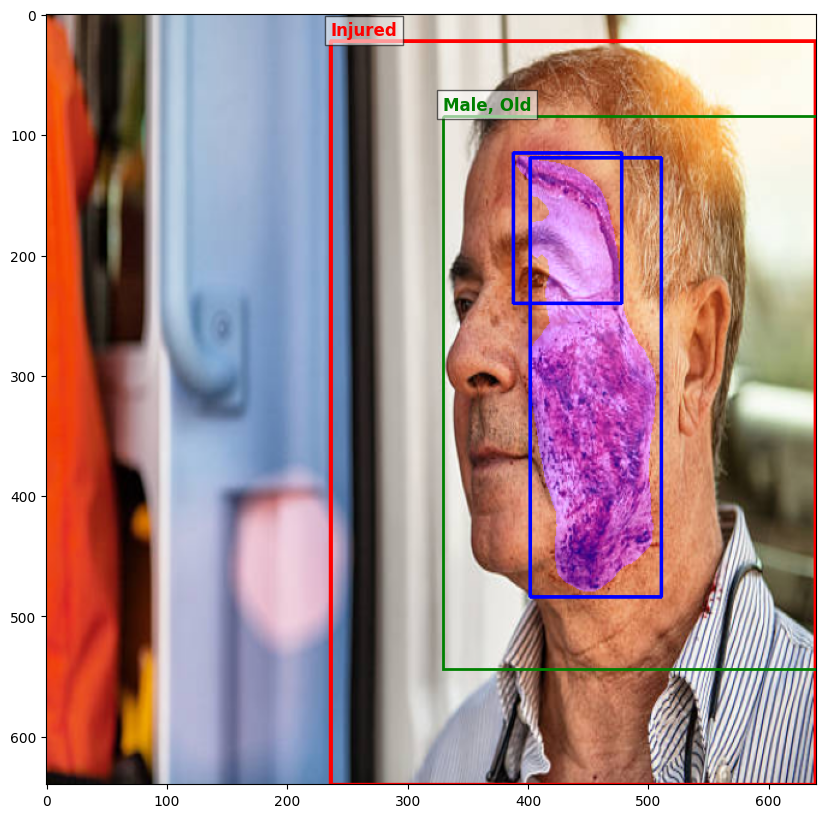

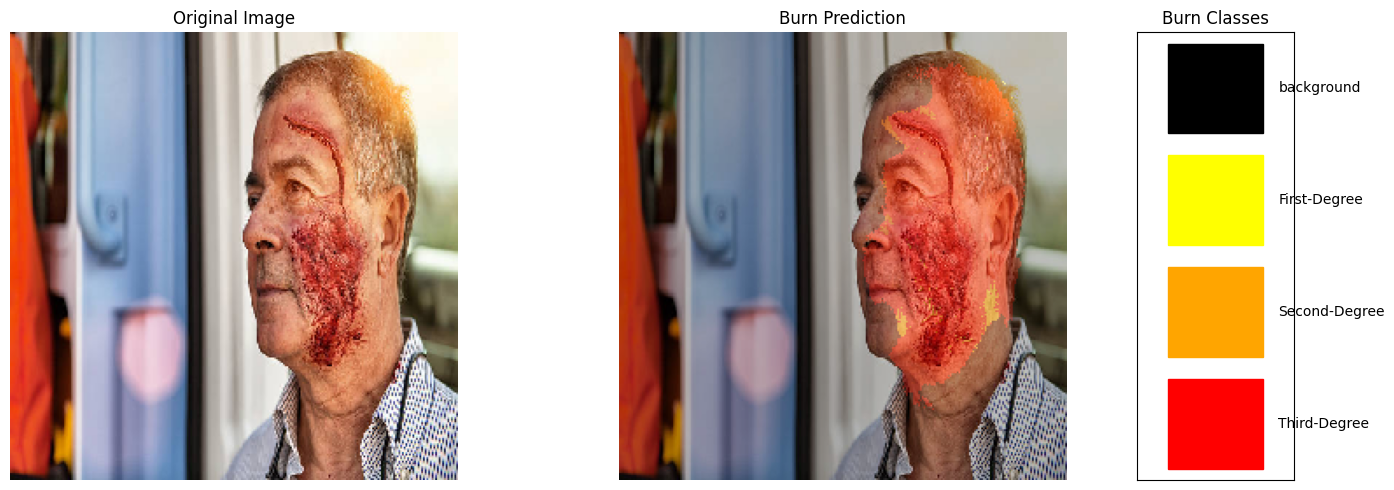

Detected: First-Degree


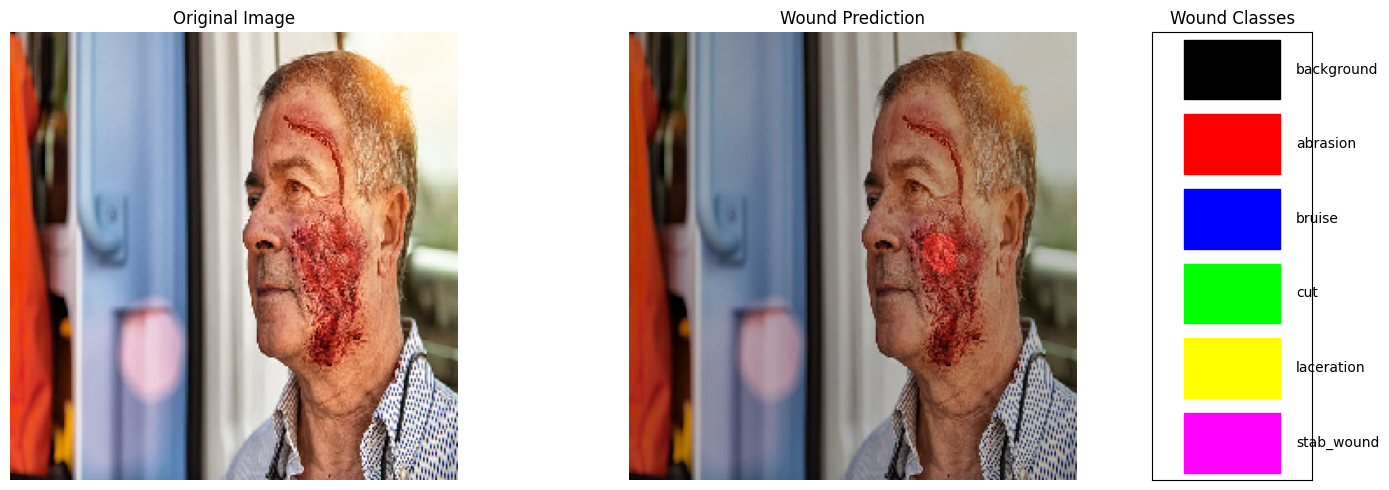

Detected: abrasion
Injury data saved successfully!


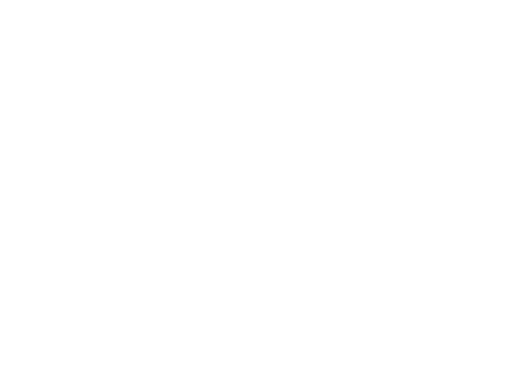

In [16]:
########################FULLLLLLLLLLLLLLLLLL INTEGRATION###########################

####Models Loading####
injury_model = YOLO("/kaggle/input/injured-not-injured-detection/pytorch/default/1/best (1).pt")
cfg = get_cfg()
cfg.merge_from_file(model_zoo.get_config_file("COCO-InstanceSegmentation/mask_rcnn_R_101_FPN_3x.yaml"))
cfg.MODEL.WEIGHTS = "/kaggle/input/mask-rcnn-blood/pytorch/default/1/mask_rcnn_blood.pth"
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.75
cfg.MODEL.ROI_HEADS.NUM_CLASSES = 1
cfg.MODEL.DEVICE = "cuda" if torch.cuda.is_available() else "cpu"
blood_predictor = DefaultPredictor(cfg)
agemodel = tf.keras.models.load_model("/kaggle/input/agemodel3/keras/default/1/age_classifier_finalfinal.h5")
gendermodel = tf.keras.models.load_model("/kaggle/input/gendermodel2/keras/default/1/mobilev2nettrial4_gender_classification.h5")

face_net = cv2.dnn.readNetFromCaffe(
    "/kaggle/input/dnnproto/deploy.prototxt",
    "/kaggle/input/dnnproto/res10_300x300_ssd_iter_140000.caffemodel"
)

face_detector = MTCNN()

####Metrics for BURN AND WOUND architectures####

@register_keras_serializable()
def multiclass_iou_metric(y_true, y_pred):
    smooth = 1e-6
    ious = []
    y_pred_classes = tf.argmax(y_pred, axis=-1)
    y_pred = tf.one_hot(y_pred_classes, NUM_CLASSES)
    for i in range(NUM_CLASSES):
        y_true_class = y_true[..., i]
        y_pred_class = y_pred[..., i]
        intersection = tf.reduce_sum(y_true_class * y_pred_class, axis=[1, 2])
        total_true = tf.reduce_sum(y_true_class, axis=[1, 2])
        total_pred = tf.reduce_sum(y_pred_class, axis=[1, 2])
        union = total_true + total_pred - intersection
        iou = tf.where(
            union > 0,
            (intersection + smooth) / (union + smooth),
            tf.ones_like(union, dtype=tf.float32) 
        )
        ious.append(tf.reduce_mean(iou))
    return tf.reduce_mean(ious)

@register_keras_serializable()
def multiclass_dice_loss(y_true, y_pred):
    smooth = 1.0
    loss = 0
    for i in range(NUM_CLASSES):
        y_true_f = y_true[..., i]
        y_pred_f = y_pred[..., i]
        intersection = K.sum(y_true_f * y_pred_f, axis=[1, 2])
        denominator = K.sum(y_true_f, axis=[1, 2]) + K.sum(y_pred_f, axis=[1, 2])
        dice = (2. * intersection + smooth) / (denominator + smooth)
        loss += (1 - K.mean(dice))
    return loss / NUM_CLASSES

@register_keras_serializable()
def focal_loss(gamma=2.0, alpha=0.25):
    def focal_loss_fn(y_true, y_pred):
        epsilon = K.epsilon()
        y_pred = K.clip(y_pred, epsilon, 1. - epsilon)
        cross_entropy = -y_true * K.log(y_pred)
        focal_weight = alpha * K.pow(1. - y_pred, gamma)
        focal_loss = focal_weight * cross_entropy
        return K.mean(K.sum(focal_loss, axis=-1))
    return focal_loss_fn

@register_keras_serializable()
def combined_loss(y_true, y_pred):
    fl_loss = focal_loss(gamma=2.0, alpha=0.25)(y_true, y_pred)
    ce_loss = tf.keras.losses.CategoricalCrossentropy(
        label_smoothing=0.1
    )(y_true, y_pred)
    dice_loss = multiclass_dice_loss(y_true, y_pred)
    return 0.5 * fl_loss + 0.3 * ce_loss + 0.2 * dice_loss

@register_keras_serializable()
def weighted_categorical_accuracy(y_true, y_pred):
    y_pred_classes = tf.argmax(y_pred, axis=-1)
    y_pred_one_hot = tf.one_hot(y_pred_classes, NUM_CLASSES)
    accuracies = []
    for i in range(NUM_CLASSES):
        y_true_class = y_true[..., i]
        y_pred_class = y_pred_one_hot[..., i]
        true_positives = tf.reduce_sum(y_true_class * y_pred_class, axis=[1, 2])
        total_pixels = tf.reduce_sum(y_true_class, axis=[1, 2])
        class_accuracy = tf.where(
            total_pixels > 0,
            true_positives / total_pixels,
            tf.zeros_like(total_pixels, dtype=tf.float32)
        )
        accuracies.append(tf.reduce_mean(class_accuracy))
    return tf.reduce_mean(accuracies)

def weighted_categorical_accuracy(y_true, y_pred):
    threshold = 0.5
    accuracies = []
    for i in range(NUM_CLASSES):
        y_true_class = y_true[..., i]
        y_pred_class = tf.cast(y_pred[..., i] > threshold, tf.float32)
        true_positives = K.sum(y_true_class * y_pred_class)
        total_pixels = K.sum(y_true_class)
        class_accuracy = tf.where(
            total_pixels > 0,
            true_positives / (total_pixels + K.epsilon()),
            0.0
        )
        accuracies.append(class_accuracy)
    return K.mean(tf.stack(accuracies))
    
def deep_supervision_loss(y_true, y_pred):
    main_loss = combined_loss(y_true, y_pred[0])
    aux_loss1 = combined_loss(y_true, y_pred[1])
    aux_loss2 = combined_loss(y_true, y_pred[2])
    total_loss = 0.7 * main_loss + 0.2 * aux_loss1 + 0.1 * aux_loss2
    return total_loss

@tf.keras.utils.register_keras_serializable()
def multiclass_dice_loss(y_true, y_pred):
    smooth = 1.0
    loss = 0
    for i in range(NUM_CLASSES):
        y_true_f = y_true[..., i]
        y_pred_f = y_pred[..., i]
        intersection = K.sum(y_true_f * y_pred_f, axis=[1, 2])
        denominator = K.sum(y_true_f, axis=[1, 2]) + K.sum(y_pred_f, axis=[1, 2])
        dice = (2. * intersection + smooth) / (denominator + smooth)
        loss += (1 - K.mean(dice))
    return loss / NUM_CLASSES

@tf.keras.utils.register_keras_serializable()
def multiclass_iou_metric(y_true, y_pred):
    smooth = 1.0
    ious = []
    for i in range(NUM_CLASSES):
        y_true_f = y_true[..., i]
        y_pred_f = y_pred[..., i]
        intersection = K.sum(y_true_f * y_pred_f, axis=[1, 2])
        union = K.sum(y_true_f, axis=[1, 2]) + K.sum(y_pred_f, axis=[1, 2]) - intersection
        iou = K.mean((intersection + smooth) / (union + smooth))
        ious.append(iou) 
    return K.mean(tf.stack(ious))

@tf.keras.utils.register_keras_serializable()
def focal_loss(gamma=2.0, alpha=0.25):
    def focal_loss_fn(y_true, y_pred):
        epsilon = K.epsilon()
        y_pred = K.clip(y_pred, epsilon, 1.0 - epsilon)
        cross_entropy = -y_true * K.log(y_pred)
        loss = alpha * K.pow(1.0 - y_pred, gamma) * cross_entropy
        return K.mean(K.sum(loss, axis=-1))
    return focal_loss_fn
    
@tf.keras.utils.register_keras_serializable()
def combined_loss(y_true, y_pred):
    fl_loss = focal_loss()(y_true, y_pred)  # Focal loss
    ce_loss = tf.keras.losses.CategoricalCrossentropy()(y_true, y_pred)  
    dice_loss = multiclass_dice_loss(y_true, y_pred) 
    return 0.5 * fl_loss + 0.3 * ce_loss + 0.2 * dice_loss
    
###Classes to segment for burn and wound###
BURN_CLASSES = {
    0: {"name": "background", "color": (0, 0, 0)},        # Black for background
    1: {"name": "First-Degree", "color": (255, 255, 0)},  # Yellow for first degree
    2: {"name": "Second-Degree", "color": (255, 165, 0)}, # Orange for second degree
    3: {"name": "Third-Degree", "color": (255, 0, 0)}     # Red for third degree
}

WOUND_CLASSES = {
    0: {"name": "background", "color": (0, 0, 0)},      # Black for background
    1: {"name": "abrasion", "color": (255, 0, 0)},      # Red
    2: {"name": "bruise", "color": (0, 0, 255)},        # Blue
    3: {"name": "cut", "color": (0, 255, 0)},           # Green
    4: {"name": "laceration", "color": (255, 255, 0)},  # Yellow
    5: {"name": "stab_wound", "color": (255, 0, 255)}   # Magenta
}


smodel = tf.keras.models.load_model(
    '/kaggle/input/final_working_segmentation/keras/default/1/final_woundModel.keras',safe_mode=False,
    custom_objects={
        'tf': tf,  # Pass TensorFlow to the Lambda layer
        'multiclass_dice_loss': multiclass_dice_loss,
        'multiclass_iou_metric': multiclass_iou_metric,
        'focal_loss': focal_loss,
        'combined_loss': combined_loss,
        'weighted_categorical_accuracy': weighted_categorical_accuracy,
        'deep_supervision_loss': deep_supervision_loss
    }
)
### ARCHI ###


MIMG_SIZE = (256, 256)
MNUM_CLASSES = 6  # 5 injury types + 1 background class


def atrous_spatial_pyramid_pooling(x, filters):
    conv_1x1 = layers.Conv2D(filters, 1, padding='same')(x)
    conv_3x3_d6 = layers.Conv2D(filters, 3, padding='same', dilation_rate=6)(x)
    conv_3x3_d12 = layers.Conv2D(filters, 3, padding='same', dilation_rate=12)(x)
    conv_3x3_d18 = layers.Conv2D(filters, 3, padding='same', dilation_rate=18)(x)
    global_avg_pool = layers.GlobalAveragePooling2D()(x)
    global_avg_pool = layers.Reshape((1, 1, x.shape[-1]))(global_avg_pool)
    global_avg_pool = layers.Conv2D(filters, 1, padding='same')(global_avg_pool)
    global_avg_pool = layers.UpSampling2D(size=(x.shape[1], x.shape[2]), interpolation='bilinear')(global_avg_pool)
    concat = layers.Concatenate()([conv_1x1, conv_3x3_d6, conv_3x3_d12, conv_3x3_d18, global_avg_pool])
    concat = layers.Conv2D(filters, 1, padding='same')(concat)
    concat = layers.BatchNormalization()(concat)
    return layers.Activation('relu')(concat)

def attention_gate(x, filters):
    import tensorflow as tf
    input_shape = tf.keras.backend.int_shape(x)
    spatial_output_shape = (input_shape[1], input_shape[2], 1)
    avg_pool = layers.Lambda(
        lambda x: tf.reduce_mean(x, axis=3, keepdims=True),
        output_shape=spatial_output_shape
    )(x)
    max_pool = layers.Lambda(
        lambda x: tf.reduce_max(x, axis=3, keepdims=True),
        output_shape=spatial_output_shape
    )(x)
    spatial_concat = layers.Concatenate()([avg_pool, max_pool])
    spatial_attention = layers.Conv2D(1, 7, padding='same', activation='sigmoid')(spatial_concat)
    x_spatial = layers.multiply([x, spatial_attention])
    channel_avg_pool = layers.GlobalAveragePooling2D()(x)
    channel_pool_shape = (1, 1, filters)
    channel_avg_pool = layers.Reshape(channel_pool_shape)(channel_avg_pool)
    channel_fc1 = layers.Conv2D(filters // 8, 1, activation='relu')(channel_avg_pool)
    channel_fc2 = layers.Conv2D(filters, 1, activation='sigmoid')(channel_fc1)
    x_channel = layers.multiply([x, channel_fc2])
    return layers.Add()([x_spatial, x_channel])

def conv_block_with_residual(x, filters, dropout_rate=0.3, apply_dropout=True):
    skip = x
    x = layers.Conv2D(filters, 3, padding='same')(x)
    x = layers.BatchNormalization()(x)
    x = layers.Activation('swish')(x)  # Swish activation (SiLU)
    x = layers.Conv2D(filters, 3, padding='same')(x)
    x = layers.BatchNormalization()(x)
    x = layers.Activation('swish')(x)
    if apply_dropout:
        x = layers.SpatialDropout2D(dropout_rate)(x)
    if skip.shape[-1] != filters:
        skip = layers.Conv2D(filters, 1, padding='same')(skip)
    x = layers.Add()([x, skip]) 
    return x

def pyramid_pooling_module(x, filters):
    shape = x.shape
    pool1 = layers.GlobalAveragePooling2D()(x)
    pool1 = layers.Reshape((1, 1, shape[-1]))(pool1)
    pool1 = layers.Conv2D(filters, 1)(pool1)
    pool1 = layers.UpSampling2D(size=(shape[1], shape[2]), interpolation='bilinear')(pool1)
    pool2 = layers.AveragePooling2D(pool_size=(2, 2))(x)
    pool2 = layers.Conv2D(filters, 1)(pool2)
    pool2 = layers.UpSampling2D(size=(2, 2), interpolation='bilinear')(pool2)
    pool3 = layers.AveragePooling2D(pool_size=(4, 4))(x)
    pool3 = layers.Conv2D(filters, 1)(pool3)
    pool3 = layers.UpSampling2D(size=(4, 4), interpolation='bilinear')(pool3)
    pool6 = layers.AveragePooling2D(pool_size=(8, 8))(x)
    pool6 = layers.Conv2D(filters, 1)(pool6)
    pool6 = layers.UpSampling2D(size=(8, 8), interpolation='bilinear')(pool6)
    concat = layers.Concatenate()([x, pool1, pool2, pool3, pool6])
    return layers.Conv2D(filters, 1)(concat)

def boundary_refinement_module(x, filters):
    conv1 = layers.Conv2D(filters, 3, padding='same', dilation_rate=1)(x)
    conv2 = layers.Conv2D(filters, 3, padding='same', dilation_rate=2)(x)
    conv3 = layers.Conv2D(filters, 3, padding='same', dilation_rate=4)(x)
    concat = layers.Concatenate()([conv1, conv2, conv3])
    refined = layers.Conv2D(filters, 1, padding='same')(concat)
    refined = layers.BatchNormalization()(refined)
    return layers.Activation('relu')(refined)
    
def advanced_wound_segmentation_model(img_size=(256, 256), filters_base=64, dropout_rate=0.3):
    inputs = layers.Input(shape=(img_size[0], img_size[1], 3))
    x = layers.Conv2D(filters_base, 3, padding='same')(inputs)
    x = layers.BatchNormalization()(x)
    x = layers.Activation('swish')(x)
    conv1 = conv_block_with_residual(x, filters_base, dropout_rate, apply_dropout=False)
    pool1 = layers.MaxPooling2D(pool_size=(2, 2))(conv1)
    conv2 = conv_block_with_residual(pool1, filters_base*2, dropout_rate)
    pool2 = layers.MaxPooling2D(pool_size=(2, 2))(conv2) 
    conv3 = conv_block_with_residual(pool2, filters_base*4, dropout_rate)
    conv3 = attention_gate(conv3, filters_base*4)
    pool3 = layers.MaxPooling2D(pool_size=(2, 2))(conv3)
    conv4 = conv_block_with_residual(pool3, filters_base*8, dropout_rate)
    pool4 = layers.MaxPooling2D(pool_size=(2, 2))(conv4)
    bridge = conv_block_with_residual(pool4, filters_base*16, dropout_rate)
    bridge = atrous_spatial_pyramid_pooling(bridge, filters_base*16)
    up4 = layers.UpSampling2D(size=(2, 2), interpolation='bilinear')(bridge)
    if up4.shape[-1] != conv4.shape[-1]:
        up4 = layers.Conv2D(conv4.shape[-1], 1)(up4)
    attention4 = attention_gate(conv4, filters_base*8)
    concat4 = layers.Concatenate()([up4, attention4])
    conv_up4 = conv_block_with_residual(concat4, filters_base*8, dropout_rate)
    up3 = layers.UpSampling2D(size=(2, 2), interpolation='bilinear')(conv_up4)
    if up3.shape[-1] != conv3.shape[-1]:
        up3 = layers.Conv2D(conv3.shape[-1], 1)(up3)
    attention3 = attention_gate(conv3, filters_base*4)
    concat3 = layers.Concatenate()([up3, attention3])
    conv_up3 = conv_block_with_residual(concat3, filters_base*4, dropout_rate)
    up2 = layers.UpSampling2D(size=(2, 2), interpolation='bilinear')(conv_up3)
    if up2.shape[-1] != conv2.shape[-1]:
        up2 = layers.Conv2D(conv2.shape[-1], 1)(up2)
    attention2 = attention_gate(conv2, filters_base*2)
    concat2 = layers.Concatenate()([up2, attention2])
    conv_up2 = conv_block_with_residual(concat2, filters_base*2, dropout_rate)
    up1 = layers.UpSampling2D(size=(2, 2), interpolation='bilinear')(conv_up2)
    if up1.shape[-1] != conv1.shape[-1]:
        up1 = layers.Conv2D(conv1.shape[-1], 1)(up1)
    attention1 = attention_gate(conv1, filters_base)
    concat1 = layers.Concatenate()([up1, attention1])
    conv_up1 = conv_block_with_residual(concat1, filters_base, dropout_rate=0)
    pyramid_features = pyramid_pooling_module(conv_up1, filters_base)
    refined_features = boundary_refinement_module(pyramid_features, filters_base)
    outputs = layers.Conv2D(MNUM_CLASSES, 1, activation='softmax')(refined_features)
    deep_sup1 = layers.UpSampling2D(size=(2, 2), interpolation='bilinear')(conv_up3)
    deep_sup1 = layers.Conv2D(MNUM_CLASSES, 1, activation='softmax')(deep_sup1)
    deep_sup2 = layers.UpSampling2D(size=(4, 4), interpolation='bilinear')(conv_up4)
    deep_sup2 = layers.Conv2D(MNUM_CLASSES, 1, activation='softmax')(deep_sup2)
    model = Model(inputs=[inputs], outputs=[outputs, deep_sup1, deep_sup2]) 
    return model
############Wound and Burn Segmentation Model Now##########
smodel.save_weights('trained_wound_segmentation.weights.h5')
segmodel=advanced_wound_segmentation_model()
segmodel.load_weights('/kaggle/working/trained_wound_segmentation.weights.h5')
burnmodel = keras.models.load_model("/kaggle/input/burn-segmentation-model/keras/default/1/burn_model.keras")
##### Start #####
image_path = '/kaggle/input/blmodeltest/bltest9.jpg'
image = cv2.imread(image_path)
image_resized = cv2.resize(image, (640, 640))
image_rgb = cv2.cvtColor(image_resized, cv2.COLOR_BGR2RGB)  # Convert to RGB for visualization
results = injury_model(image_resized)
result = results[0]
injured_count = 0
injured_boxes = []
total_blood_pixels = 0
bounding_box_pixels=0
for box, conf, cls in zip(result.boxes.xyxy, result.boxes.conf, result.boxes.cls):
    x1, y1, x2, y2 = map(int, box)  
    if int(cls) == 1:
        injured_count += 1  
        injured_boxes.append((x1, y1, x2, y2))
        cv2.rectangle(image_resized, (x1, y1), (x2, y2), (0, 0, 255), 2)  
print(f"Total Injuries Detected: {injured_count}")
##-----------------------------------Stage 1 done -----------------------------------##
# Stage 2.1: Blood Segmentation 
if injured_count > 0:    
    blood_outputs = blood_predictor(image_resized)
    blood_masks = blood_outputs["instances"].pred_masks.cpu().numpy()
    blood_boxes = blood_outputs["instances"].pred_boxes.tensor.cpu().numpy()
    blood_mask_color = np.zeros_like(image_resized)
    for i, mask in enumerate(blood_masks):
        total_blood_pixels += np.sum(mask)
        x1_blood, y1_blood, x2_blood, y2_blood = map(int, blood_boxes[i])
        box_area = (x2_blood - x1_blood) * (y2_blood - y1_blood)
        bounding_box_pixels += box_area
        for (x1_inj, y1_inj, x2_inj, y2_inj) in injured_boxes:
            if not (x2_blood < x1_inj or x1_blood > x2_inj or y2_blood < y1_inj or y1_blood > y2_inj):  # Check overlap
                blood_mask_color[mask] = [255, 0, 0]  # Red color for blood area
                cv2.rectangle(image_resized, (x1_blood, y1_blood), (x2_blood, y2_blood), (255, 0, 0), 2)  # Draw red rectangle for blood
    image_resized = cv2.addWeighted(image_resized, 1, blood_mask_color, 0.5, 0)
print(f"Total Blood Pixels: {total_blood_pixels}")
if total_blood_pixels == 0:
    blood_severity = "No blood info"
elif total_blood_pixels > (1/4) * bounding_box_pixels:
    blood_severity = "Excessive"
else:
    blood_severity = "Moderate"
print(f"Blood Severity: {blood_severity}")
total_pixels = image_resized.shape[0] * image_resized.shape[1]
print(f"Total Pixels in Image: {total_pixels}")
fig, ax = plt.subplots(figsize=(10, 10))
ax.imshow(cv2.cvtColor(image_resized, cv2.COLOR_BGR2RGB))  
#------------------------------------------------------------------------------------------------------#
# Stage 2.2: Age and Gender 
age_classes = ["Baby", "Kid", "Old", "Young"]
for box, conf, cls in zip(result.boxes.xyxy, result.boxes.conf, result.boxes.cls):
    x1, y1, x2, y2 = map(int, box)  
    if int(cls) == 1:
        ax.add_patch(plt.Rectangle((x1, y1), x2 - x1, y2 - y1, edgecolor='red', linewidth=2, fill=False))
        ax.text(x1, y1 - 5, "Injured", color='red', fontsize=12, fontweight='bold', bbox=dict(facecolor='white', alpha=0.6))
        blob = cv2.dnn.blobFromImage(image_rgb, scalefactor=1.0, size=(300, 300), mean=(104.0, 177.0, 123.0))
        face_net.setInput(blob)
        detections = face_net.forward()
        face_detected = False
        for i in range(detections.shape[2]):
            confidence = detections[0, 0, i, 2]
            if confidence > 0.2:  # Confidence threshold
                h, w = image_rgb.shape[:2]
                box = detections[0, 0, i, 3:7] * np.array([w, h, w, h])
                fx, fy, fw, fh = box.astype("int")
                if x1 <= fx <= x2 and y1 <= fy <= y2:  
                    face_x1, face_y1 = max(0, fx), max(0, fy)
                    face_x2, face_y2 = min(image.shape[1], fx + fw), min(image.shape[0], fy + fh)
                    ax.add_patch(plt.Rectangle((face_x1, face_y1), fw, fh, edgecolor='green', linewidth=2, fill=False))
                    face_img = image_rgb[face_y1:face_y2, face_x1:face_x2]
                    face_img = cv2.resize(face_img, (224, 224))
                    face_img = np.expand_dims(face_img / 255.0, axis=0)  # Normalize and add batch dim
                    gender_pred = gendermodel.predict(face_img)
                    age_pred = agemodel.predict(face_img)
                    gender_label = "Male" if gender_pred[0][0] > 0.5 else "Female"
                    age_label = age_classes[np.argmax(age_pred)]  # Get highest probability class
                    label_text = f"{gender_label}, {age_label}"
                    ax.text(face_x1, face_y1 - 5, label_text, color='green', fontsize=12, fontweight='bold', bbox=dict(facecolor='white', alpha=0.6))
                    face_detected = True
                    print(f"Detected Face in Injured Area by DNN: Gender: {gender_label}, Age: {age_label}")
                    break
        if not face_detected:
            faces = face_detector.detect_faces(image_rgb)
            for face in faces:
                x, y, w, h = face['box']
                face_x1, face_y1, face_x2, face_y2 = x, y, x + w, y + h
                if x1 <= face_x1 <= x2 and y1 <= face_y1 <= y2:
                    ax.add_patch(plt.Rectangle((face_x1, face_y1), w, h, edgecolor='green', linewidth=2, fill=False))
                    face_img = image_rgb[face_y1:face_y2, face_x1:face_x2]
                    face_img = cv2.resize(face_img, (224, 224))
                    face_img = np.expand_dims(face_img / 255.0, axis=0)  # Normalize and add batch dim
                    gender_pred = gendermodel.predict(face_img)
                    age_pred = agemodel.predict(face_img)
                    gender_label = "Male" if gender_pred[0][0] > 0.5 else "Female"
                    age_label = age_classes[np.argmax(age_pred)]  # Get highest probability class
                    label_text = f"{gender_label}, {age_label}"
                    ax.text(face_x1, face_y1 - 5, label_text, color='green', fontsize=12, fontweight='bold', bbox=dict(facecolor='white', alpha=0.6))
                    face_detected = True
                    print(f"Detected Face in Injured Area by MTCNN: Gender: {gender_label}, Age: {age_label}")
                    break
        if not face_detected:
            gender_label=""
            age_label=""
            print("No faces recognized and cannot get gender and age info")
#------------------------------------------------------------------------------------------------------#
# Stage 2.3: Wound and Burn Segmentation 
if injured_count > 0:
    simg = tf.keras.preprocessing.image.load_img(image_path, target_size=(256, 256))
    simg_array = tf.keras.preprocessing.image.img_to_array(simg)
    if np.max(simg_array) > 1.0:
        simg_array = simg_array / 255.0
    input_tensor = np.expand_dims(simg_array, axis=0)
    burn_pred_masks = burnmodel.predict(input_tensor)
    wound_pred_masks = segmodel.predict(input_tensor)
    def create_custom_overlay_mask(mask, INJURY_CLASSES, alpha=0.5):
        if isinstance(mask, list):
            mask = mask[0]
        if hasattr(mask, 'numpy'):
            mask = mask.numpy()
        if len(mask.shape) == 4:
            mask = mask[0]
        if len(mask.shape) == 3 and mask.shape[-1] > 1:
            mask = np.argmax(mask, axis=-1)
        height, width = mask.shape
        overlay = np.zeros((height, width, 4), dtype=np.float32)
        for class_idx, class_info in INJURY_CLASSES.items():
            if class_idx > np.max(mask):
                continue
            r, g, b = class_info["color"]
            color = np.array([r/255, g/255, b/255, 1.0])
            class_mask = (mask == class_idx)[..., np.newaxis]
            overlay[..., :3] += class_mask * color[:3]
            overlay[..., 3] += class_mask[..., 0] * alpha    
        return overlay, mask
    burn_overlay, burn_mask = create_custom_overlay_mask(burn_pred_masks, BURN_CLASSES)
    burn_unique_classes = np.unique(burn_mask)
    burn_info = "No burn injury detected"
    for class_idx in burn_unique_classes:
        if class_idx in BURN_CLASSES and class_idx != 0:
            burn_info = f"Detected: {BURN_CLASSES[class_idx]['name']}"
            break
    wound_overlay, wound_mask = create_custom_overlay_mask(wound_pred_masks, WOUND_CLASSES)
    wound_unique_classes = np.unique(wound_mask)
    wound_info = "No wound injury detected"
    for class_idx in wound_unique_classes:
        if class_idx in WOUND_CLASSES and class_idx != 0:
            wound_info = f"Detected: {WOUND_CLASSES[class_idx]['name']}"
            break
    fig, axes = plt.subplots(1, 3, figsize=(15, 5), gridspec_kw={'width_ratios': [4, 4, 1]})
    axes[0].imshow(img)
    axes[0].set_title('Original Image')
    axes[0].axis('off')
    axes[1].imshow(img)
    axes[1].imshow(burn_overlay, alpha=0.5)
    axes[1].set_title('Burn Prediction')
    axes[1].axis('off')
    cbar_ax = axes[2]
    cbar_ax.set_title('Burn Classes')
    num_classes = len(BURN_CLASSES)
    for i, (class_idx, class_info) in enumerate(BURN_CLASSES.items()):
        y_pos = 1.0 - (i + 0.5) / num_classes
        r, g, b = class_info["color"]
        color_patch = plt.Rectangle((0.2, y_pos - 0.4/num_classes), 0.6, 0.8/num_classes, 
                                  color=(r/255, g/255, b/255))
        cbar_ax.add_patch(color_patch)
        cbar_ax.text(0.9, y_pos, class_info["name"], ha='left', va='center', transform=cbar_ax.transAxes)
    cbar_ax.set_xticks([])
    cbar_ax.set_yticks([])
    plt.tight_layout()
    plt.show()
    print(burn_info)
    fig, axes = plt.subplots(1, 3, figsize=(15, 5), gridspec_kw={'width_ratios': [4, 4, 1]})
    axes[0].imshow(img)
    axes[0].set_title('Original Image')
    axes[0].axis('off')
    axes[1].imshow(img)
    axes[1].imshow(wound_overlay, alpha=0.5)
    axes[1].set_title('Wound Prediction')
    axes[1].axis('off')
    cbar_ax = axes[2]
    cbar_ax.set_title('Wound Classes')
    num_classes = len(WOUND_CLASSES)
    for i, (class_idx, class_info) in enumerate(WOUND_CLASSES.items()):
        y_pos = 1.0 - (i + 0.5) / num_classes
        r, g, b = class_info["color"]
        color_patch = plt.Rectangle((0.2, y_pos - 0.4/num_classes), 0.6, 0.8/num_classes, 
                                  color=(r/255, g/255, b/255))
        cbar_ax.add_patch(color_patch)
        cbar_ax.text(0.9, y_pos, class_info["name"], ha='left', va='center', transform=cbar_ax.transAxes)
    cbar_ax.set_xticks([])
    cbar_ax.set_yticks([])
    plt.tight_layout()
    plt.show()
    print(wound_info)
#------------------------------------------------------------------------------------------------------#
#Stage 2.4 Injury Report
if(injured_count>0):
    save_injury_data(injured_count, gender_label, age_label, burn_info, wound_info, blood_severity)
plt.axis("off")
plt.show()

In [17]:
import sqlite3

def fetch_injury_data():
    # Connect to the database
    conn = sqlite3.connect("injuries_analysis.db")
    cursor = conn.cursor()

    # Fetch all records
    cursor.execute("SELECT * FROM InjuryAnalysis")
    records = cursor.fetchall()  # Fetch all rows

    # Close connection
    conn.close()
    
    return records

# Example usage
injury_data = fetch_injury_data()
for record in injury_data:
    print(record)  # Print each row


(1, 1, 'Male', 'Old', 'Detected: First-Degree', 'Detected: abrasion', 'Excessive')
(2, 1, 'Male', 'Old', 'Detected: First-Degree', 'Detected: abrasion', 'Excessive')
(3, 1, 'Male', 'Old', 'Detected: First-Degree', 'Detected: abrasion', 'Excessive')
